In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import rdkit.Chem as Chem

# Load data

In [2]:
# ERed_data=pd.read_csv(r"../Data/Reduction_potential_213BzNSN.csv")
ERed_data=pd.read_csv(r"../Data/All_bzNSN_derivates_from_AL_and_DFT.csv",usecols=["SMILES","Ered(V)"])
ERed_data.head()

SMILES  Ered(V)
0   Cc1c2c(cc3nsnc13)N(C)CCN2CCN(C)C     1.27
1       CCN1CCN(CCOC)c2c1cc1nsnc1c2C     1.27
2   CCNc1c2c(cc3nsnc13)N(C)CCN2C(C)C     1.24
3    CCCN1CCN(CC)c2cc3nsnc3c(NCC)c21     1.22
4  CCNc1c2c(cc3nsnc13)N(CC)CCN2C(C)C     1.20

In [3]:
print(f"Before: ERed_data.shape={ERed_data.shape}")
ERed_data=ERed_data.loc[ERed_data["SMILES"].drop_duplicates().index,:]
print(f"After: ERed_data.shape={ERed_data.shape}")

Before: ERed_data.shape=(2888, 2)
After: ERed_data.shape=(2888, 2)


# No duplicate SMILES found
- check again with mol descriptors
- SMILES string is not a unique representation of a molecule

In [4]:
isnd=np.arange(0,ERed_data.shape[0],1)
ERed_data.index=isnd
print(ERed_data.shape)
ERed_data.head()

(2888, 2)


SMILES  Ered(V)
0   Cc1c2c(cc3nsnc13)N(C)CCN2CCN(C)C     1.27
1       CCN1CCN(CCOC)c2c1cc1nsnc1c2C     1.27
2   CCNc1c2c(cc3nsnc13)N(C)CCN2C(C)C     1.24
3    CCCN1CCN(CC)c2cc3nsnc3c(NCC)c21     1.22
4  CCNc1c2c(cc3nsnc13)N(CC)CCN2C(C)C     1.20

# Feature Generation and Exploration

In [5]:
# 2D Mol. Descriptors
from rdkit.Chem import Descriptors
desc_list = [desc[0] for desc in Descriptors._descList]
print(len(desc_list))
print(desc_list)

208
['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 

**Add more features**

In [6]:
from rdkit.Chem import rdMolDescriptors 

def smi_to_mol_prop(smi,property_names = list(rdMolDescriptors.Properties.GetAvailableProperties())):
    """
    This function will return a numpy array with all molecular properties of a SMILES string
    Input (smi): a SMILES string
    Output: np.array()
    eg. df['mol_prop'] = df.SMILES.apply(smi2molprop)
    output: each row of df['mol_prop'] will have a np.array with all molecular props.
    """
    property_getter = rdMolDescriptors.Properties(property_names)
    
    mol = Chem.MolFromSmiles(smi)
    props = None
    if mol:
        props = np.array(property_getter.ComputeProperties(mol))
    return props

In [7]:
properties=list(rdMolDescriptors.Properties.GetAvailableProperties())

In [8]:
#Generate descriptors for each molecule
from rdkit.ML.Descriptors import MoleculeDescriptors

calc = MoleculeDescriptors.MolecularDescriptorCalculator(desc_list)

rdkit_desc = [calc.CalcDescriptors(Chem.MolFromSmiles(x)) for x in ERed_data["SMILES"]]

In [9]:
df_2Ddescp = pd.DataFrame(rdkit_desc,columns=desc_list)
print(df_2Ddescp.shape)
df_2Ddescp.head()

(2888, 208)


MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0        4.456023        1.020889           4.456023           1.020889   
1        5.243940        0.748371           5.243940           0.748371   
2        4.487068        0.475834           4.487068           0.475834   
3        4.513689        0.897986           4.513689           0.897986   
4        4.512897        0.476118           4.512897           0.476118   

        qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.861773  291.424         270.256  291.151767                  108   
1  0.864637  292.408         272.248  292.135782                  108   
2  0.941806  291.424         270.256  291.151767                  108   
3  0.918901  305.451         282.267  305.167417                  114   
4  0.939652  305.451         282.267  305.167417                  114   

   NumRadicalElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0                    0  ...           0             0           0   
1                    0  ...           0             0           0   
2                    0  ...           0             0           0   
3                    0  ...           0             0           0   
4                    0  ...           0             0           0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
0                  0             0            0            0             0   
1                  0             0            0            0             0   
2                  0             0            0            0             0   
3                  0             0            0            0             0   
4                  0             0            0            0             0   

   fr_unbrch_alkane  fr_urea  
0                 0        0  
1                 0        0  
2                 0        0  
3                 0        0  
4                 0        0  

[5 rows x 208 columns]

In [10]:
df_2Ddescp.drop_duplicates()

MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0           4.456023        1.020889           4.456023           1.020889   
1           5.243940        0.748371           5.243940           0.748371   
2           4.487068        0.475834           4.487068           0.475834   
3           4.513689        0.897986           4.513689           0.897986   
4           4.512897        0.476118           4.512897           0.476118   
...              ...             ...                ...                ...   
2883        5.547149        0.773927           5.547149           0.773927   
2884        5.789717        0.333355           5.789717           0.333355   
2885        4.528497        0.961234           4.528497           0.961234   
2886        5.672634        0.778405           5.672634           0.778405   
2887        5.786405        0.638967           5.786405           0.638967   

           qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0     0.861773  291.424         270.256  291.151767                  108   
1     0.864637  292.408         272.248  292.135782                  108   
2     0.941806  291.424         270.256  291.151767                  108   
3     0.918901  305.451         282.267  305.167417                  114   
4     0.939652  305.451         282.267  305.167417                  114   
...        ...      ...             ...         ...                  ...   
2883  0.765217  320.462         296.270  320.167082                  120   
2884  0.847318  292.408         272.248  292.135782                  108   
2885  0.865330  291.424         270.256  291.151767                  108   
2886  0.765781  292.408         272.248  292.135782                  108   
2887  0.728664  309.391         290.239  309.114712                  114   

      NumRadicalElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0                       0  ...           0             0           0   
1                       0  ...           0             0           0   
2                       0  ...           0             0           0   
3                       0  ...           0             0           0   
4                       0  ...           0             0           0   
...                   ...  ...         ...           ...         ...   
2883                    0  ...           0             0           0   
2884                    0  ...           0             0           0   
2885                    0  ...           0             0           0   
2886                    0  ...           0             0           0   
2887                    0  ...           0             0           0   

      fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
0                     0             0            0            0             0   
1                     0             0            0            0             0   
2                     0             0            0            0             0   
3                     0             0            0            0             0   
4                     0             0            0            0             0   
...                 ...           ...          ...          ...           ...   
2883                  0             0            0            0             0   
2884                  0             0            0            0             0   
2885                  0             0            0            0             0   
2886                  0             0            0            0             0   
2887                  0             0            0            0             0   

      fr_unbrch_alkane  fr_urea  
0                    0        0  
1                    0        0  
2                    0        0  
3                    0        0  
4                    0        0  
...                ...      ...  
2883                 1        0  
2884                 0        0  
2885        

# Remove duplicate molecules
- SMILES string is not unique for a molecule, pandas might have missed some duplicate molecules at the start

In [11]:
print(f"Before: ERed_data.shape={ERed_data.shape}")
without_duplicate_mols=df_2Ddescp.drop_duplicates().index
ERed_data=ERed_data.loc[without_duplicate_mols,:]
ERed_data.index=np.arange(ERed_data.shape[0])
print(f"After: ERed_data.shape={ERed_data.shape}")
print(f"Before: df_2Ddescp.shape={df_2Ddescp.shape}")
df_2Ddescp=df_2Ddescp.loc[without_duplicate_mols,:]
df_2Ddescp.index=np.arange(df_2Ddescp.shape[0])
print(f"After: df_2Ddescp.shape={df_2Ddescp.shape}")


Before: ERed_data.shape=(2888, 2)
After: ERed_data.shape=(2763, 2)
Before: df_2Ddescp.shape=(2888, 208)
After: df_2Ddescp.shape=(2763, 208)


3D Descriptors

In [12]:
import rdkit.Chem.Descriptors3D as Rdkit3d

desc_3d=[]
for m in dir(Rdkit3d):
    if "__" not in m:
        desc_3d.append(str(m))
print(desc_3d)
desc_3d.remove('rdMolDescriptors')
print(desc_3d)

['Asphericity', 'Eccentricity', 'InertialShapeFactor', 'NPR1', 'NPR2', 'PMI1', 'PMI2', 'PMI3', 'RadiusOfGyration', 'SpherocityIndex', 'rdMolDescriptors']
['Asphericity', 'Eccentricity', 'InertialShapeFactor', 'NPR1', 'NPR2', 'PMI1', 'PMI2', 'PMI3', 'RadiusOfGyration', 'SpherocityIndex']


In [13]:
from rdkit.Chem.Descriptors3D import *
from rdkit.Chem import AllChem
def rdkit_all_3D(smi):
    # print(smi)
    m=Chem.MolFromSmiles(smi)
    m=Chem.AddHs(m)
    AllChem.EmbedMolecule(m)
    AllChem.UFFOptimizeMolecule(m)
    asp=Asphericity(m)
    ecc=Eccentricity(m)
    isf=InertialShapeFactor(m)
    npr1=NPR1(m)
    npr2=NPR2(m)
    pmi1=PMI1(m)
    pmi2=PMI2(m)
    pmi3=PMI3(m)
    RadG=RadiusOfGyration(m)
    Si=SpherocityIndex(m)
    return [asp,ecc,isf,npr1,npr2,pmi1,pmi2,pmi3,RadG,Si]

In [14]:
df_molprop=pd.DataFrame(ERed_data["SMILES"].apply(lambda x:smi_to_mol_prop(x,property_names=properties)).to_list(),columns=properties)
df_molprop.head()

exactmw      amw  lipinskiHBA  lipinskiHBD  NumRotatableBonds  NumHBD  \
0  291.151767  291.424          5.0          0.0                3.0     0.0   
1  292.135782  292.408          5.0          0.0                4.0     0.0   
2  291.151767  291.424          5.0          1.0                3.0     1.0   
3  305.167417  305.451          5.0          1.0                5.0     1.0   
4  305.167417  305.451          5.0          1.0                4.0     1.0   

   NumHBA  NumHeavyAtoms  NumAtoms  NumHeteroatoms  ...      chi0n     chi1n  \
0     6.0           20.0      41.0             6.0  ...  12.550094  6.943478   
1     6.0           20.0      40.0             6.0  ...  12.218235  7.005867   
2     6.0           20.0      41.0             6.0  ...  12.473124  7.140155   
3     6.0           21.0      44.0             6.0  ...  13.017094  7.826711   
4     6.0           21.0      44.0             6.0  ...  13.180230  7.716276   

      chi2n     chi3n     chi4n  hallKierAlpha     kappa1    kappa2    kappa3  \
0  3.990306  3.990306  2.790050          -1.40  13.577001  5.179478  2.226066   
1  3.984172  3.984172  2.920064          -1.40  13.577001  5.535354  2.125124   
2  3.855243  3.855243  2.834057          -1.56  13.424314  5.086989  1.984487   
3  4.029118  4.029118  3.102774          -1.56  14.380319  6.052915  2.413726   
4  4.100912  4.100912  3.083301          -1.56  14.380319  5.673993  2.310895   

        Phi  
0  3.516089  
1  3.757675  
2  3.414467  
3  4.144898  
4  3.885421  

[5 rows x 43 columns]

In [15]:
#add 3D descriptors
df_molprop["3D"]=ERed_data["SMILES"].apply(lambda x:rdkit_all_3D(x))
df_molprop.columns

Index(['exactmw', 'amw', 'lipinskiHBA', 'lipinskiHBD', 'NumRotatableBonds',
       'NumHBD', 'NumHBA', 'NumHeavyAtoms', 'NumAtoms', 'NumHeteroatoms',
       'NumAmideBonds', 'FractionCSP3', 'NumRings', 'NumAromaticRings',
       'NumAliphaticRings', 'NumSaturatedRings', 'NumHeterocycles',
       'NumAromaticHeterocycles', 'NumSaturatedHeterocycles',
       'NumAliphaticHeterocycles', 'NumSpiroAtoms', 'NumBridgeheadAtoms',
       'NumAtomStereoCenters', 'NumUnspecifiedAtomStereoCenters', 'labuteASA',
       'tpsa', 'CrippenClogP', 'CrippenMR', 'chi0v', 'chi1v', 'chi2v', 'chi3v',
       'chi4v', 'chi0n', 'chi1n', 'chi2n', 'chi3n', 'chi4n', 'hallKierAlpha',
       'kappa1', 'kappa2', 'kappa3', 'Phi', '3D'],
      dtype='object')

In [16]:
df_3Ddesc=pd.DataFrame(df_molprop["3D"].to_list(),columns=desc_3d)
df_molprop=df_molprop.drop(columns=["3D"])

In [17]:
Xdata_btz=pd.concat([df_molprop,df_2Ddescp,df_3Ddesc],axis=1)
# Xdata_btz=pd.concat([df_molprop,df_2Ddescp],axis=1)
print(Xdata_btz.shape)
Xdata_btz.head()

(2763, 261)


exactmw      amw  lipinskiHBA  lipinskiHBD  NumRotatableBonds  NumHBD  \
0  291.151767  291.424          5.0          0.0                3.0     0.0   
1  292.135782  292.408          5.0          0.0                4.0     0.0   
2  291.151767  291.424          5.0          1.0                3.0     1.0   
3  305.167417  305.451          5.0          1.0                5.0     1.0   
4  305.167417  305.451          5.0          1.0                4.0     1.0   

   NumHBA  NumHeavyAtoms  NumAtoms  NumHeteroatoms  ...  Asphericity  \
0     6.0           20.0      41.0             6.0  ...     0.380879   
1     6.0           20.0      40.0             6.0  ...     0.274450   
2     6.0           20.0      41.0             6.0  ...     0.164608   
3     6.0           21.0      44.0             6.0  ...     0.231434   
4     6.0           21.0      44.0             6.0  ...     0.197662   

   Eccentricity  InertialShapeFactor      NPR1      NPR2         PMI1  \
0      0.958980             0.000797  0.283475  0.769909   965.648451   
1      0.923664             0.000491  0.383203  0.659686  1344.063022   
2      0.875604             0.000600  0.483029  0.725397  1209.358252   
3      0.880471             0.000343  0.474100  0.558953  1630.344962   
4      0.875232             0.000409  0.483704  0.611467  1496.452447   

          PMI2         PMI3  RadiusOfGyration  SpherocityIndex  
0  2622.668901  3406.464761          3.464252         0.200792  
1  2313.808908  3507.441253          3.500322         0.138349  
2  1816.171936  2503.695064          3.080027         0.500454  
3  1922.142395  3438.824291          3.382934         0.130196  
4  1891.716716  3093.735698          3.257358         0.250279  

[5 rows x 261 columns]

In [18]:
# Remove columns with all 0
print(f"Initial Xdata_btz shape = %d x %d" %Xdata_btz.shape)
Xdata_btz=Xdata_btz.drop(Xdata_btz.columns[Xdata_btz.eq(0).all()],axis=1)
print(f"Xdata_btz shape (now) = %d x %d" %Xdata_btz.shape)

Initial Xdata_btz shape = 2763 x 261
Xdata_btz shape (now) = 2763 x 178


In [19]:
# Remove duplicates
print(f"Initial Xdata_btz shape = %d x %d" %Xdata_btz.shape)
Xdata_btz=Xdata_btz.loc[:,~Xdata_btz.columns.duplicated()].copy()
print(f"Xdata_btz shape (now) = %d x %d" %Xdata_btz.shape)

Initial Xdata_btz shape = 2763 x 178
Xdata_btz shape (now) = 2763 x 170


In [20]:
all_desc=Xdata_btz.columns
print(len(all_desc))

170


Correlated Features

In [21]:
def remove_corr_features(Xdata,corr_cutoff = 0.75):
    """
    This function will drop highly correlated features
    Output: a pd.Dataframe 
    """
    cor_matrix=Xdata.corr().abs()
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))

    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr_cutoff)]
    print(f"Dropped %d features with correlation coeff. > %0.2f" %(len(to_drop),corr_cutoff))

    Xdata=Xdata.drop(columns=to_drop,axis=1)
    print(f"Remaining features %d" %(Xdata.shape[1]))
    return Xdata

In [22]:
Xdata_btz_uncorr=remove_corr_features(Xdata=Xdata_btz, corr_cutoff=0.8)
print(Xdata_btz_uncorr.shape)

Dropped 105 features with correlation coeff. > 0.80
Remaining features 65
(2763, 65)


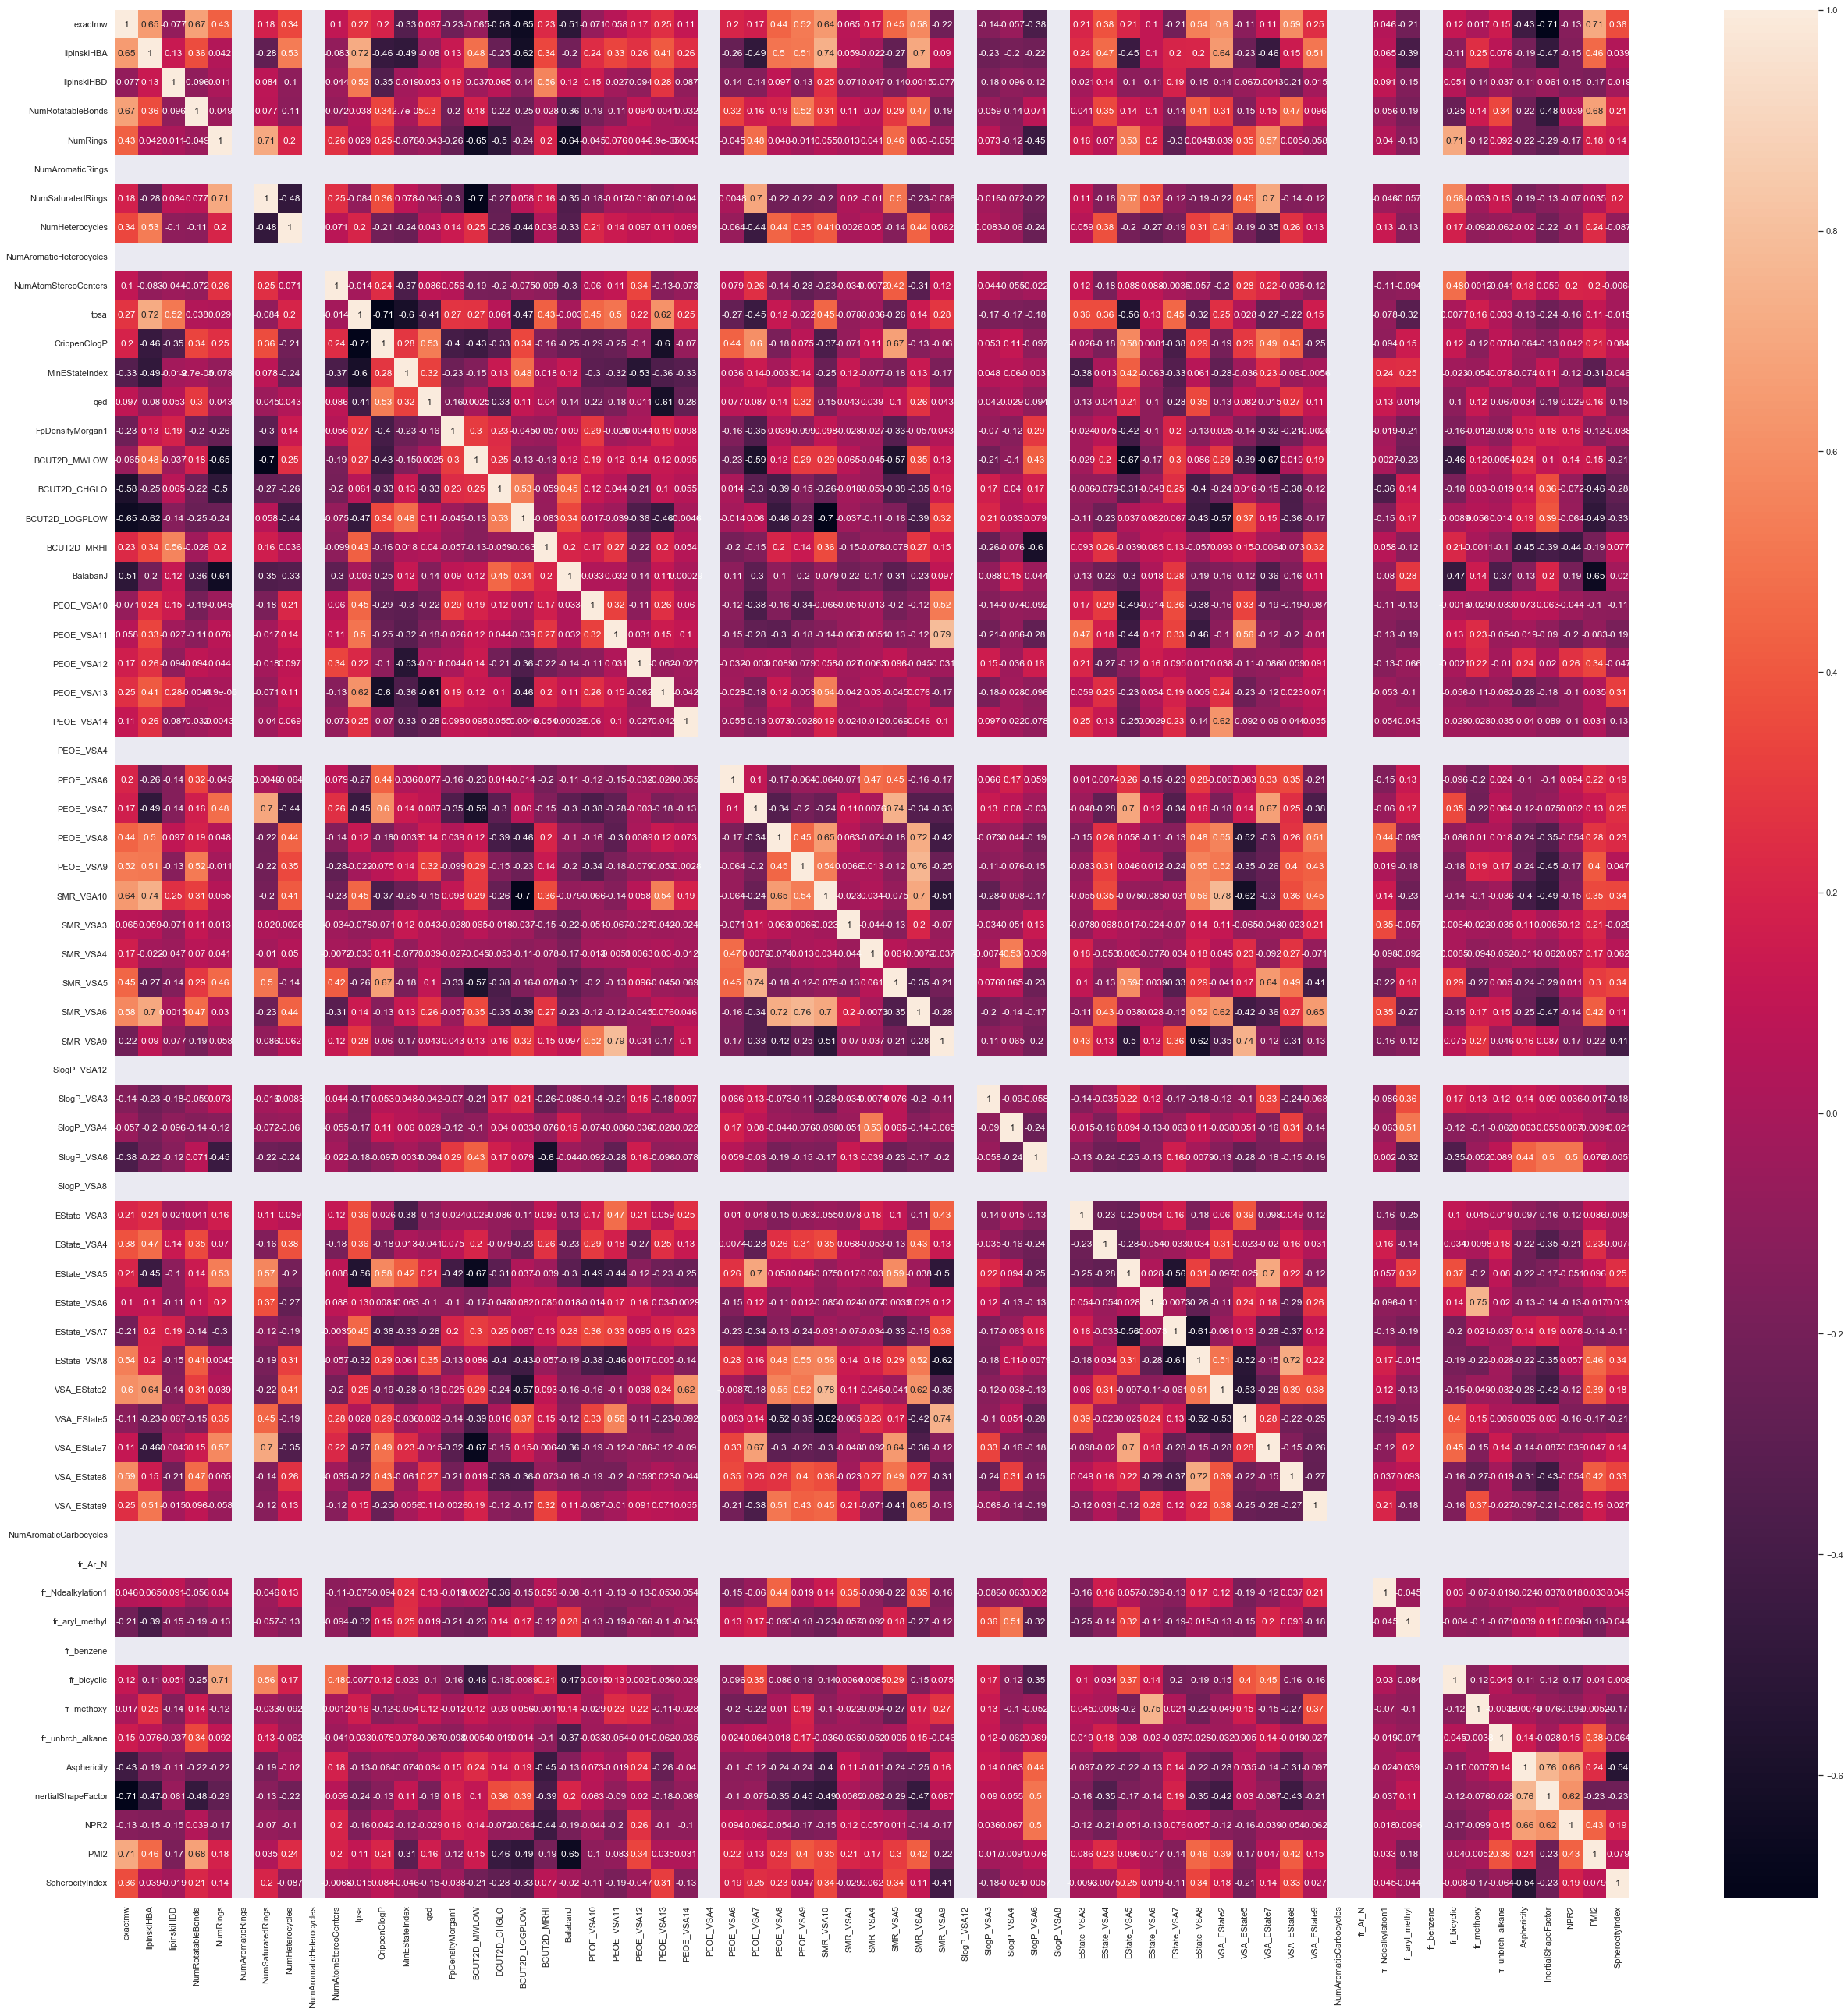

In [23]:
import matplotlib.pyplot as plt

corr = Xdata_btz_uncorr.corr('pearson')
sns.set(rc={"figure.figsize":(36, 36)}) 
sns.heatmap(corr, annot=True)
plt.tight_layout()
plt.savefig("../Figures/ERed_features_corr080.png",dpi=300)
# plt.show()


# ERed and Feauture correlation

In [24]:
from scipy import stats
from scipy.stats import norm

In [25]:
target = 'Ered(V)'
descriptors=Xdata_btz_uncorr.columns

In [26]:
corr_ered_feat=[]

C:\Users\jaina\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


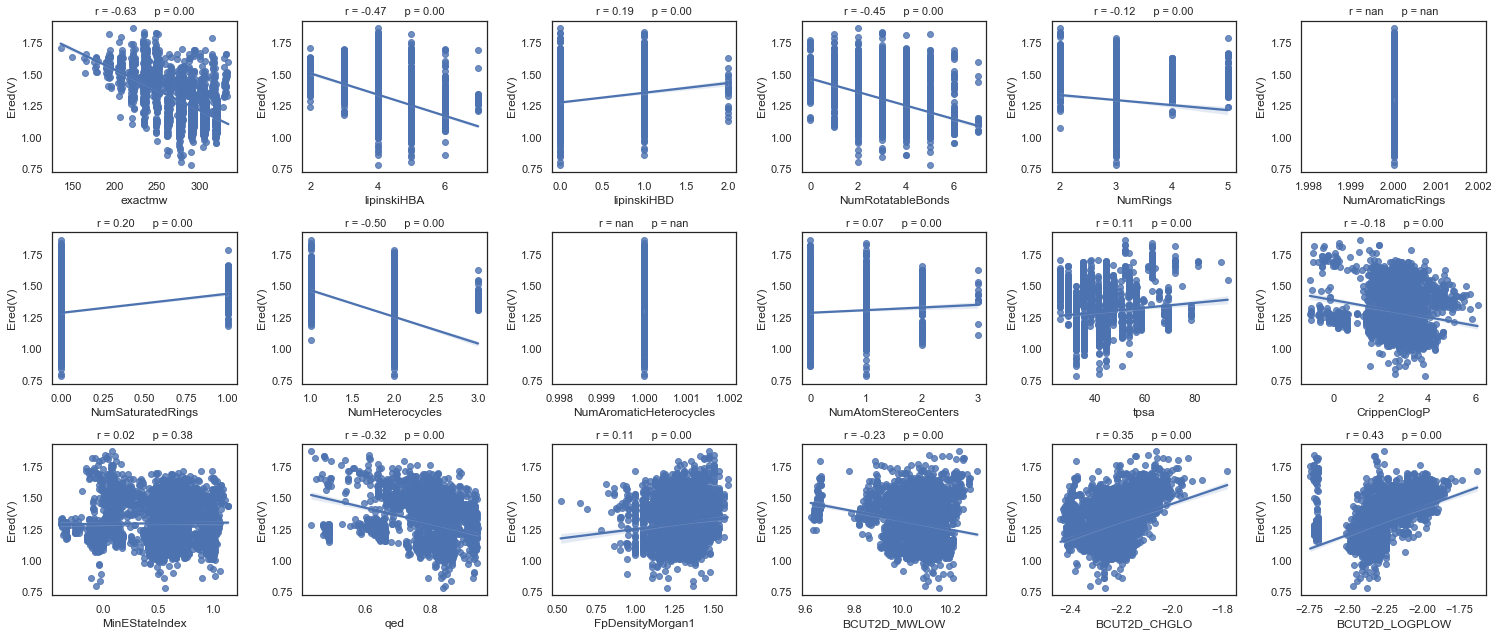

In [27]:
nr_rows = 3
nr_cols = 6
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        
        if i < len(descriptors):
            
            sns.regplot(x=Xdata_btz_uncorr[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            
            stp = stats.pearsonr(Xdata_btz_uncorr[descriptors[i]], ERed_data[target])
            # corr_ered_feat.append([i,stp[0]])
            if type(stp[0]) is not int:
                corr_ered_feat.append([descriptors[i],stp[0]])
            # print([descriptors[i],stp[0]])
            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
# plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

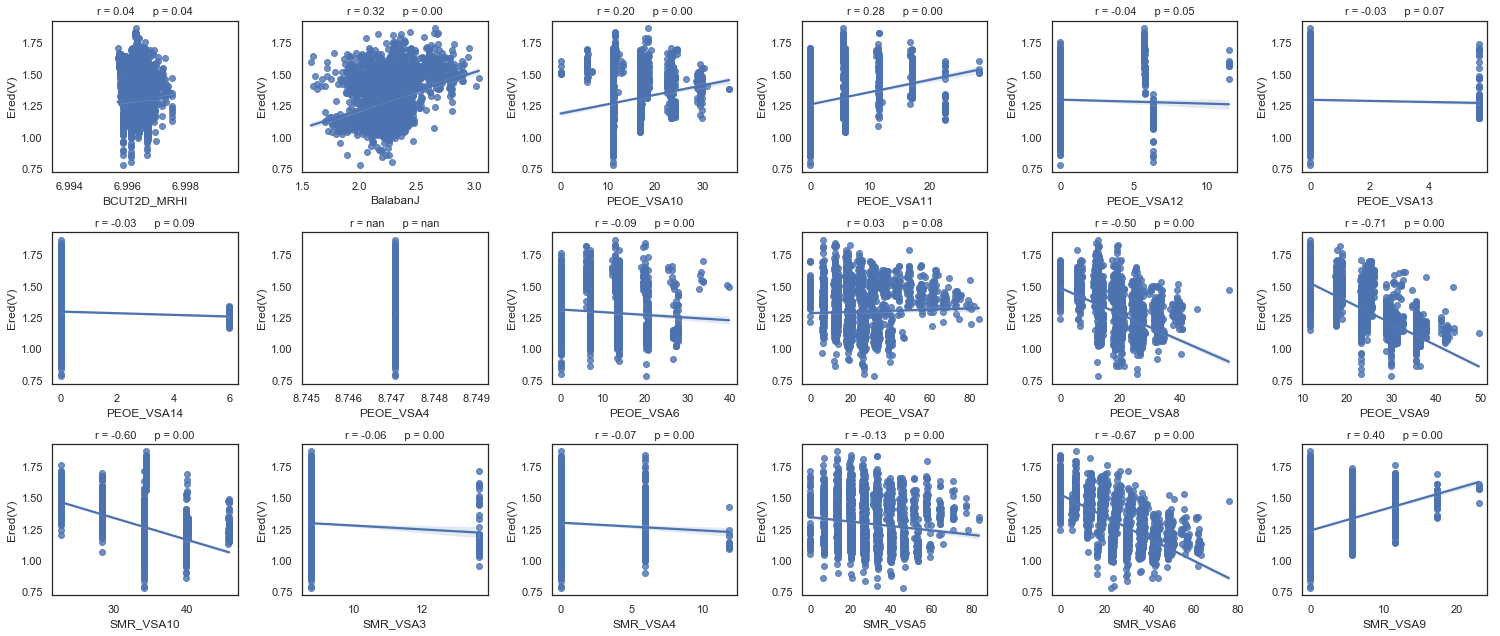

In [28]:
nr_rows = 3
nr_cols = 6
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+18
        
        if i < len(descriptors):
            
            sns.regplot(x=Xdata_btz_uncorr[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            
            stp = stats.pearsonr(Xdata_btz_uncorr[descriptors[i]], ERed_data[target])

            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            # corr_ered_feat.append([i,stp[0]])
            if type(stp[0]) is not int:
                corr_ered_feat.append([descriptors[i],stp[0]])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
# plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

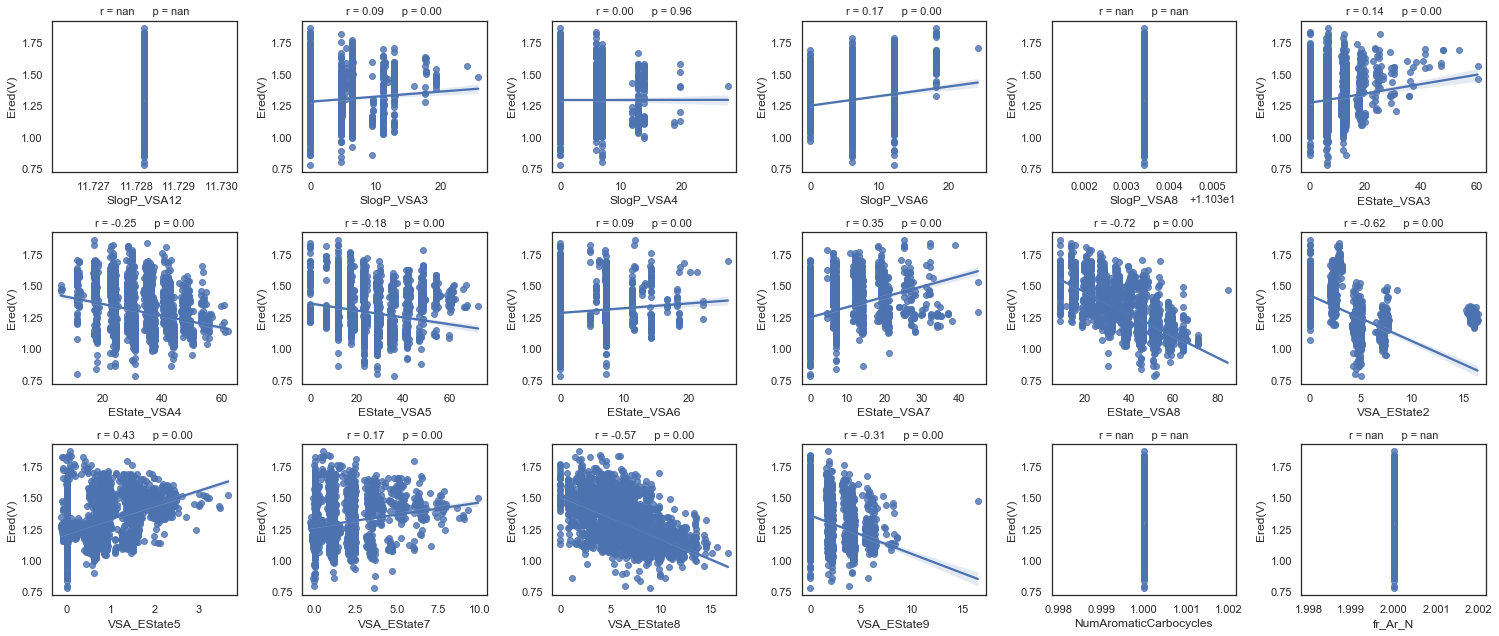

In [29]:
nr_rows = 3
nr_cols = 6
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+18+18
        
        if i < len(descriptors):
            
            sns.regplot(x=Xdata_btz_uncorr[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            
            stp = stats.pearsonr(Xdata_btz_uncorr[descriptors[i]], ERed_data[target])
            # corr_ered_feat.append([descriptors[i],stp[0]])
            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            
            if type(stp[0]) is not int:
                corr_ered_feat.append([descriptors[i],stp[0]])
            # print([descriptors[i],stp[0]])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
# plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

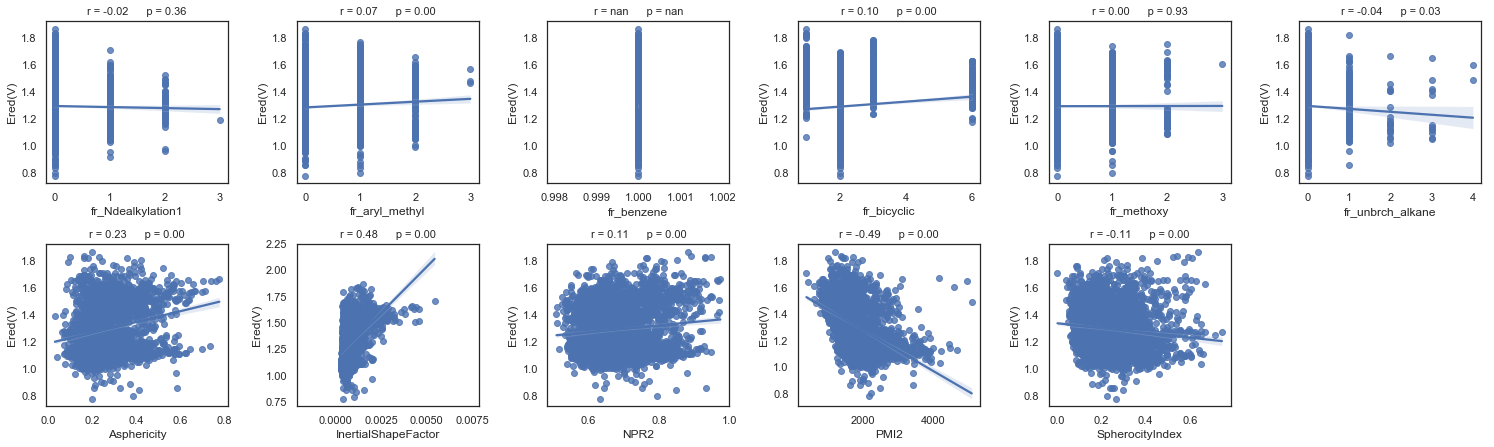

In [30]:
nr_rows = 3
nr_cols = 6
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+18+18+18
        
        if i < len(descriptors):
            
            sns.regplot(x=Xdata_btz_uncorr[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            # print(f"r={r},c={c},axs[r={r}][c={c}]={axs[r][c]}")
            stp = stats.pearsonr(Xdata_btz_uncorr[descriptors[i]], ERed_data[target])
            corr_ered_feat.append([i,stp[0]])
            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            if type(stp[0]) is not int:
                corr_ered_feat.append([descriptors[i],stp[0]])
            
            axs[r][c].set_title(str_title,fontsize=11)
        else:
            fig.delaxes(axs[r][c])

plt.tight_layout()    
# plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

In [31]:
corr_ered_feat=pd.DataFrame(corr_ered_feat,columns=["Descriptors","Pearsons"])

In [32]:
# remove_desc=[desc for i,desc in enumerate(corr_ered_feat["Descriptors"]) if type(desc) is int]
remove_desc2=[i for i,desc in enumerate(corr_ered_feat["Descriptors"]) if type(desc) is int]

In [33]:
corr_ered_feat=corr_ered_feat.drop(remove_desc2)

In [34]:
corr_ered_feat_sorted=corr_ered_feat.dropna(axis=0).sort_values("Pearsons")

# Most dominant features 

In [35]:
df_reducedDescp=pd.concat([corr_ered_feat_sorted[:15],corr_ered_feat_sorted[-10:]])

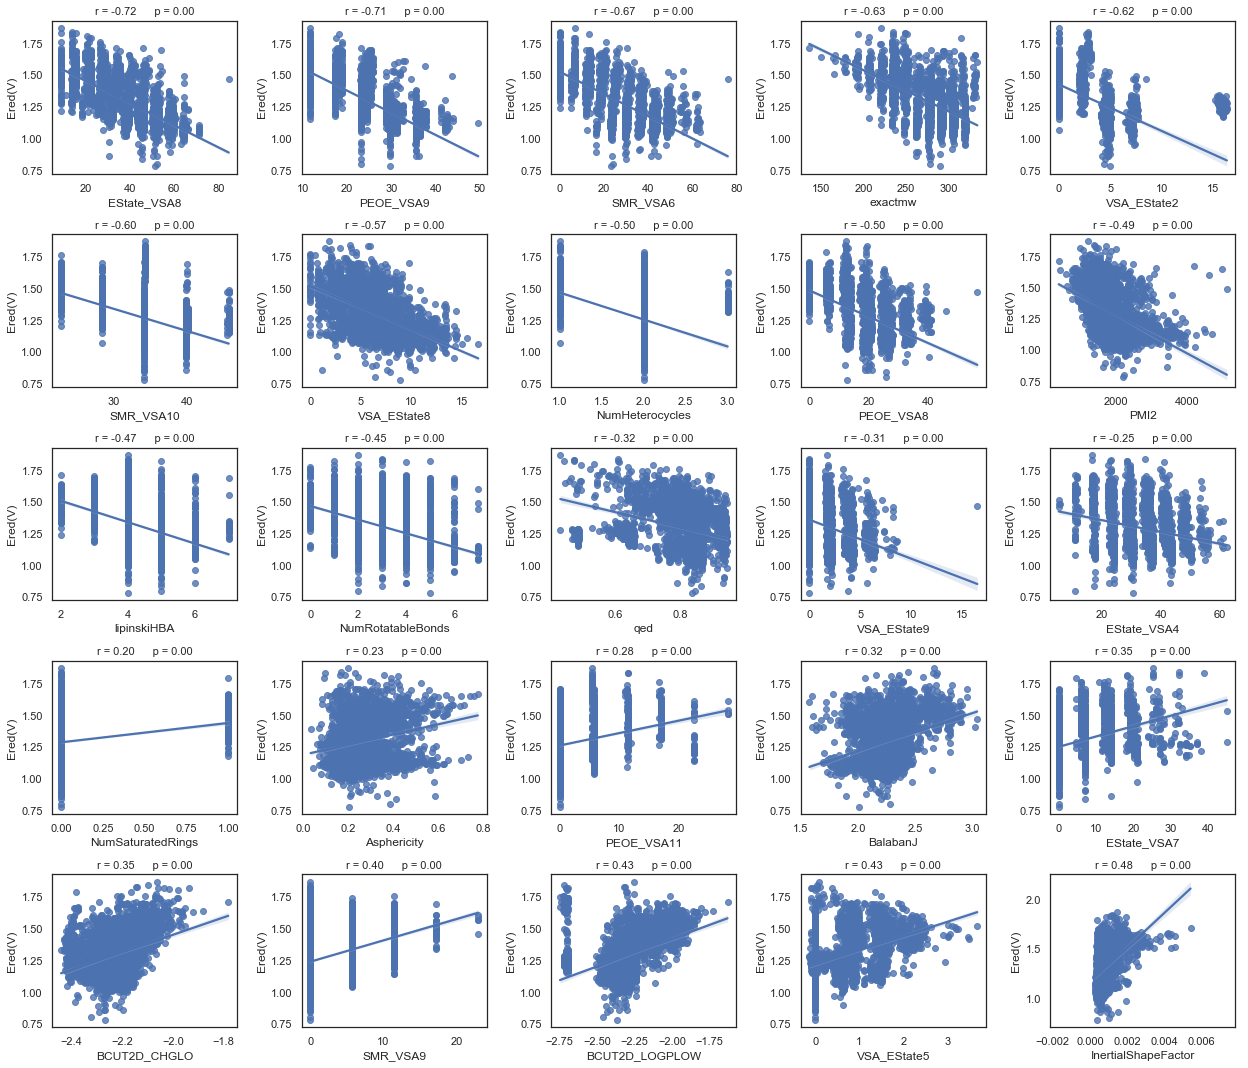

In [36]:
target = 'Ered(V)'
descriptors=df_reducedDescp.Descriptors.to_list()

nr_rows = 5
nr_cols = 5
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        
        if i < len(descriptors):

            # print(i,descriptors[i])
            sns.regplot(x=Xdata_btz_uncorr[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            
            stp = stats.pearsonr(Xdata_btz_uncorr[descriptors[i]], ERed_data[target])
            # corr_ered_feat.append([descriptors[i],stp[0]])
            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            corr_ered_feat.append([descriptors[i],stp[0]])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
# plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

# Add Scaffold as a new feature
- 1: new scaffold STZs
- 0: Other scaffold BTZs

In [37]:
def substruct_in_smi(mol_smi_str,pat_smi_str):
    """
    This function will return True if the substructure (pattern) is present in the SMILES string.
    Input: smi_str = A SMILES string;   sub_str = Pattern 
    Output: True (substruture found in the smi); False (substruture not found in the smi)
    """   
    mol = Chem.MolFromSmiles(mol_smi_str)
    pat = Chem.MolFromSmiles(pat_smi_str) 

    return mol.HasSubstructMatch(pat)


In [38]:
newclass=ERed_data["SMILES"].apply(lambda x:1*substruct_in_smi(mol_smi_str=x,pat_smi_str="c1c2c(cc3nsnc13)N(C)CN2C"))

In [39]:
Xdata_btz_uncorr_clean=Xdata_btz_uncorr[df_reducedDescp.Descriptors.to_list()]
Xdata_btz_uncorr_clean.head()

EState_VSA8  PEOE_VSA9   SMR_VSA6     exactmw  VSA_EState2  SMR_VSA10  \
0    57.579929  23.102960  57.121861  291.151767     7.048598  34.136361   
1    38.460741  29.709842  49.695525  292.135782     4.836841  34.136361   
2    57.748939  28.790346  41.798549  291.151767     4.777731  39.823748   
3    50.701267  28.790346  47.840390  305.167417     4.943843  39.823748   
4    57.625004  28.790346  41.295634  305.167417     4.922731  39.823748   

   VSA_EState8  NumHeterocycles  PEOE_VSA8         PMI2  ...  \
0     6.418928              2.0  38.790149  2622.668901  ...   
1     9.134667              2.0  38.852275  2313.808908  ...   
2     9.584423              2.0  32.723782  1816.171936  ...   
3    11.767929              2.0  32.723782  1922.142395  ...   
4    12.885515              2.0  32.220866  1891.716716  ...   

   NumSaturatedRings  Asphericity  PEOE_VSA11  BalabanJ  EState_VSA7  \
0                0.0     0.380879         0.0  2.063612          0.0   
1                0.0     0.274450         0.0  2.122519          0.0   
2                0.0     0.164608         0.0  2.285684          0.0   
3                0.0     0.231434         0.0  2.222052          0.0   
4                0.0     0.197662         0.0  2.274537          0.0   

   BCUT2D_CHGLO  SMR_VSA9  BCUT2D_LOGPLOW  VSA_EState5  InertialShapeFactor  
0     -2.382209       0.0       -2.421053          0.0             0.000797  
1     -2.390295       0.0       -2.423841          0.0             0.000491  
2     -2.402864       0.0       -2.428193          0.0             0.000600  
3     -2.393344       0.0       -2.414287          0.0             0.000343  
4     -2.414260       0.0       -2.441912          0.0             0.000409  

[5 rows x 25 columns]

In [40]:
Xdata_btz_uncorr_clean_scaffold=Xdata_btz_uncorr_clean.copy()

In [41]:
Xdata_btz_uncorr_clean_scaffold.insert(loc=0,column="Scaffold",value=newclass)
Xdata_btz_uncorr_clean_scaffold.head()

Scaffold  EState_VSA8  PEOE_VSA9   SMR_VSA6     exactmw  VSA_EState2  \
0         0    57.579929  23.102960  57.121861  291.151767     7.048598   
1         0    38.460741  29.709842  49.695525  292.135782     4.836841   
2         0    57.748939  28.790346  41.798549  291.151767     4.777731   
3         0    50.701267  28.790346  47.840390  305.167417     4.943843   
4         0    57.625004  28.790346  41.295634  305.167417     4.922731   

   SMR_VSA10  VSA_EState8  NumHeterocycles  PEOE_VSA8  ...  NumSaturatedRings  \
0  34.136361     6.418928              2.0  38.790149  ...                0.0   
1  34.136361     9.134667              2.0  38.852275  ...                0.0   
2  39.823748     9.584423              2.0  32.723782  ...                0.0   
3  39.823748    11.767929              2.0  32.723782  ...                0.0   
4  39.823748    12.885515              2.0  32.220866  ...                0.0   

   Asphericity  PEOE_VSA11  BalabanJ  EState_VSA7  BCUT2D_CHGLO  SMR_VSA9  \
0     0.380879         0.0  2.063612          0.0     -2.382209       0.0   
1     0.274450         0.0  2.122519          0.0     -2.390295       0.0   
2     0.164608         0.0  2.285684          0.0     -2.402864       0.0   
3     0.231434         0.0  2.222052          0.0     -2.393344       0.0   
4     0.197662         0.0  2.274537          0.0     -2.414260       0.0   

   BCUT2D_LOGPLOW  VSA_EState5  InertialShapeFactor  
0       -2.421053          0.0             0.000797  
1       -2.423841          0.0             0.000491  
2       -2.428193          0.0             0.000600  
3       -2.414287          0.0             0.000343  
4       -2.441912          0.0             0.000409  

[5 rows x 26 columns]

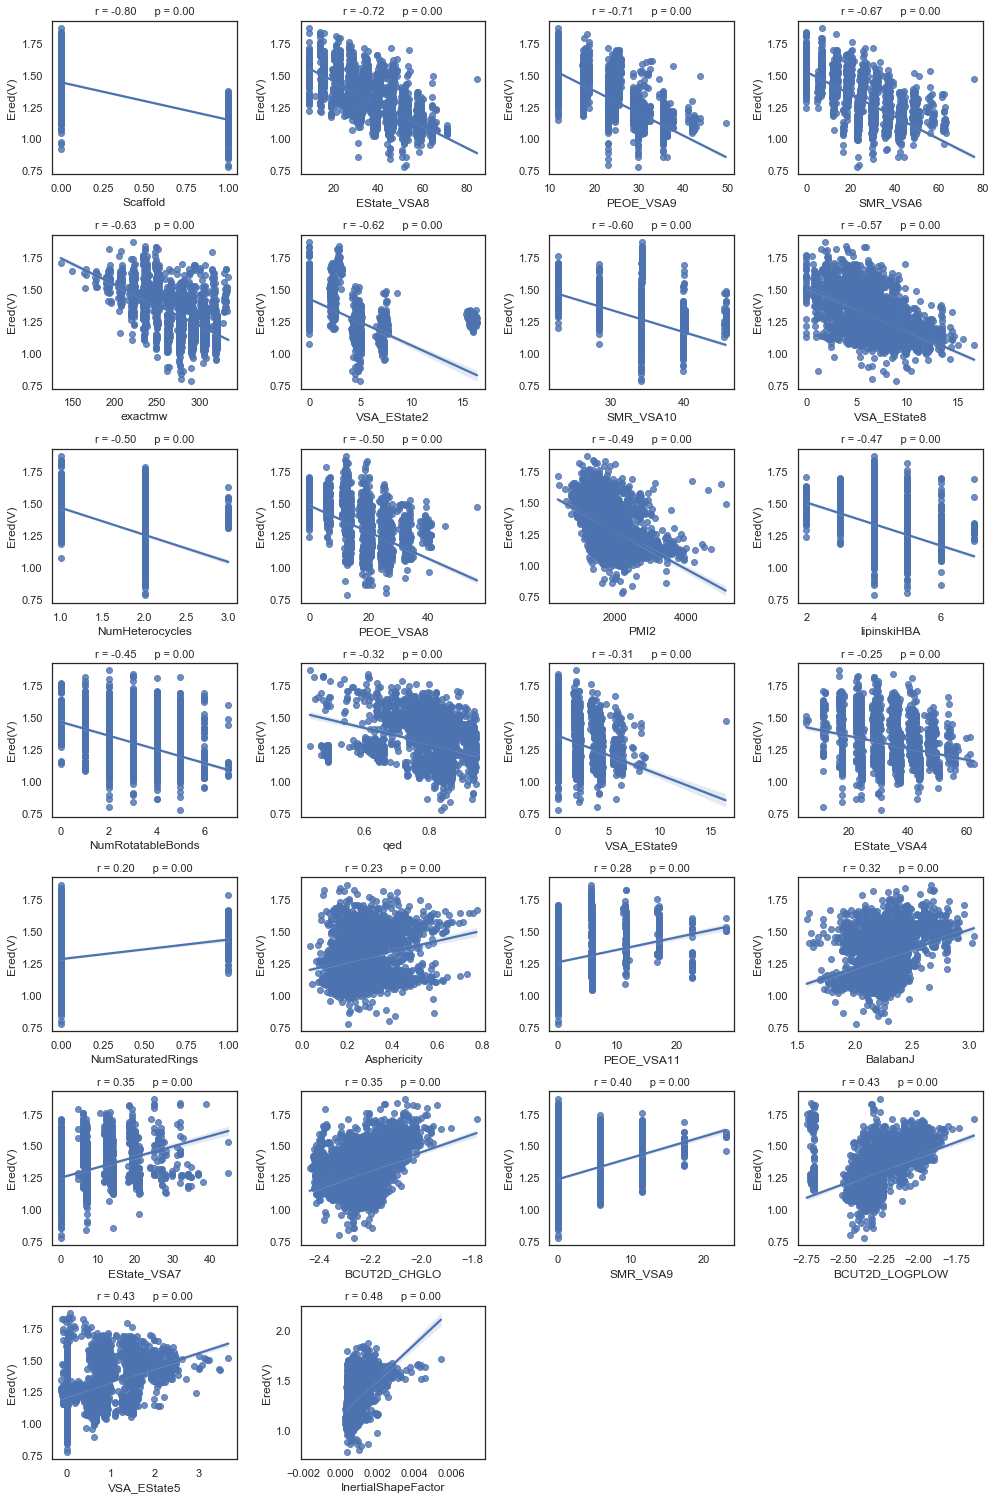

In [42]:
target = 'Ered(V)'
descriptors=Xdata_btz_uncorr_clean_scaffold.columns

nr_rows = 7
nr_cols = 4
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        
        if i < len(descriptors):

            # print(i,descriptors[i])
            sns.regplot(x=Xdata_btz_uncorr_clean_scaffold[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            
            stp = stats.pearsonr(Xdata_btz_uncorr_clean_scaffold[descriptors[i]], ERed_data[target])
            # corr_ered_feat.append([descriptors[i],stp[0]])
            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            corr_ered_feat.append([descriptors[i],stp[0]])
            axs[r][c].set_title(str_title,fontsize=11)
        else:
            fig.delaxes(axs[r][c])
            
plt.tight_layout()    
# plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

# Check the performance of Descriptors with the GPR model

In [43]:
from sklearn.preprocessing import StandardScaler
def do_scaling(scaler=StandardScaler(), xtrain=None, xtest=None):
    """
    Usage: do_scaling(scaler=MinMaxScaler(), xtrain=xtrain, xtest=test) 
    xtrain and xtest are pd.Dataframes
    Caution: Do test_train_split before scaling
    Return: return scaled non-None xtrain and xtest
    """
    st = scaler

    if xtrain is not None:
        col=xtrain.columns.values.tolist()
        xtrain=st.fit_transform(xtrain)  
        xtrain=pd.DataFrame(xtrain,columns=col)

        if xtest is not None:
            
            xtest=st.transform(xtest)
            xtest=pd.DataFrame(xtest,columns=col)
            print("returning scaled train and test data")
            return xtrain,xtest
        else:
            print("test data is not provided, returning only scaled train data")
            return xtrain
    else:
        print("Give train data, returning None")
        return xtrain,xtest

In [44]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C ,WhiteKernel as Wht,Matern as matk

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


import torch, gpytorch
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE

# Machine learning-realated functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # For normalizing inputs
from sklearn.decomposition import PCA # Principle component analysis

In [45]:
def do_pca(xtrain=None, xtest=None, rvar=0.95):
    """
    Usage: do_pca(xtrain=xtrain, xtest=test) 
    Caution: Do test_train_split and scaling before pca
    Return: Transformed xtrain and xtest if they are not None
    """
    
    if xtrain is not None:
        
        pca = PCA().fit(xtrain)
        evr = np.cumsum(pca.explained_variance_ratio_)
        n_comp = 1+np.nonzero(evr > rvar)[0][0]

        print(str(n_comp)+" principal components can describe > "+ str(rvar*100)+ "% of variance in the data")
        print("Selected "+str(n_comp)+" components for PCA")
        
        # col=[]
        # for i in range(1,1+n_comp,1):
        #     col.append("PC"+str(i))

        pca = PCA(n_components=n_comp)
        xtrain = pca.fit_transform(xtrain) 
        # xtrain=pd.DataFrame(xtrain,columns=col)

        if xtest is not None:
            
            xtest=pca.transform(xtest)
            # xtest=pd.DataFrame(xtest,columns=col)
            print("returning pca transformed train and test data")
            return xtrain,xtest
        else:
            print("test data is not provided, returning only transformed train data")
            return xtrain
    else:
        print("Give train data, returning None")
        return xtrain,xtest

In [46]:
def gpregression_pytorch(X_train,y_train,num_iter=200,learning_rate=0.1,verbose=False):
    
    """
    Gaussian Process Regression implementation with the GPyTorch
    
    Input: gpregression_pytorch(X_train,y_train,num_iter,learning_rate)
    
    Retrun: trained_model, trained_likelihood

    """
    # nfeatures=X_train.shape[1]
    train_x=torch.from_numpy(np.array(X_train))
    train_y=torch.from_numpy(np.array(y_train))
    torch.set_default_dtype(torch.float64)

    # We will use the simplest form of GP model, exact inference
    class ExactGPModel(gpytorch.models.ExactGP):

        def __init__(self, train_x, train_y, likelihood):
            super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
            self.mean_module = gpytorch.means.ConstantMean()
            # self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel()) # can modify this
            # self.covar_module = ScaleKernel(ScaleKernel(RBFKernel()))
            # self.covar_module = ScaleKernel(ScaleKernel(RBFKernel() + LinearKernel())) 
            # self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel()) 
            self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel(nu=1.5))
            # self.covar_module = ScaleKernel(PeriodicKernel()+MaternKernel())
            # self.covar_module = ScaleKernel(RBFKernel())
        
        def forward(self, x):
            mean_x = self.mean_module(x)
            covar_x = self.covar_module(x)
            return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

    # initialize likelihood and model
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = ExactGPModel(train_x, train_y, likelihood)

    # this is for running the notebook in our testing framework
    import os
    smoke_test = ('CI' in os.environ)
    training_iter = 2 if smoke_test else num_iter


    # Find optimal model hyperparameters
    model.train()
    likelihood.train()

    # Use the adam optimizer # for hyperparameter tuning
    optimizer = torch.optim.Adam([
        {'params': model.parameters()},  # Includes GaussianLikelihood parameters
    ], lr=learning_rate)

    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    for i in range(training_iter):
        # Zero gradients from previous iteration
        optimizer.zero_grad()
        # Output from model
        output = model(train_x)
        # Calc loss and backprop gradients
        loss = -mll(output, train_y)
        loss.backward()
        if verbose*1*((i+1)%50==0 or i==0):
            print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (i + 1, training_iter, loss.item(),model.covar_module.base_kernel.lengthscale.item(),model.likelihood.noise.item()))
            # print('Iter %d/%d - Loss: %.3f    noise: %.3f' % (i + 1, training_iter, loss.item(),model.likelihood.noise.item()))
        optimizer.step()

    # Get into evaluation (predictive posterior) mode
    model.eval()
    likelihood.eval()

    return model,likelihood

def gprediction_pytorch(model,likelihood,X_test):
    
    """
    Gaussian Process Predictions with gpr_pytorch
    
    Use: 
    model, likelihood = gpregression_pytorch(X_train,y_train,num_iter=200,learning_rate=0.1)  
    ypred, ysigma = gprediction__pytorch(model,likelihood,X_test)

    Return: ypred and ysigma numpy arrays
    
    """
    # Get into evaluation (predictive posterior) mode
    model.eval()
    likelihood.eval()
    # Make predictions by feeding model through likelihood
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        test_x = torch.from_numpy(np.array(X_test))
        torch.set_default_dtype(torch.float64)
        observed_pred = likelihood(model(test_x))
        ypred = observed_pred.mean.numpy()
        ysigma = observed_pred.stddev.numpy()
    return ypred,ysigma

In [47]:
def gpregression_pytorch(X_train,y_train,num_iter=200,learning_rate=0.1,verbose=False):
    
    """
    Gaussian Process Regression implementation with the GPyTorch
    
    Input: gpregression_pytorch(X_train,y_train,num_iter,learning_rate)
    
    Retrun: trained_model, trained_likelihood

    """
    # nfeatures=X_train.shape[1]
    train_x=torch.from_numpy(np.array(X_train))
    train_y=torch.from_numpy(np.array(y_train))
    torch.set_default_dtype(torch.float64)

    # We will use the simplest form of GP model, exact inference
    class ExactGPModel(gpytorch.models.ExactGP):

        def __init__(self, train_x, train_y, likelihood):
            super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
            self.mean_module = gpytorch.means.ConstantMean()
            # self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel()) # can modify this
            # self.covar_module = ScaleKernel(ScaleKernel(RBFKernel()))
            # self.covar_module = ScaleKernel(ScaleKernel(RBFKernel() + LinearKernel())) 
            # self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel()) 
            self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel(nu=1.5))
            # self.covar_module = ScaleKernel(PeriodicKernel()+MaternKernel())
            # self.covar_module = ScaleKernel(RBFKernel())
        
        def forward(self, x):
            mean_x = self.mean_module(x)
            covar_x = self.covar_module(x)
            return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

    # initialize likelihood and model
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = ExactGPModel(train_x, train_y, likelihood)

    # this is for running the notebook in our testing framework
    import os
    smoke_test = ('CI' in os.environ)
    training_iter = 2 if smoke_test else num_iter


    # Find optimal model hyperparameters
    model.train()
    likelihood.train()

    # Use the adam optimizer # for hyperparameter tuning
    optimizer = torch.optim.Adam([
        {'params': model.parameters()},  # Includes GaussianLikelihood parameters
    ], lr=learning_rate)

    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    for i in range(training_iter):
        # Zero gradients from previous iteration
        optimizer.zero_grad()
        # Output from model
        output = model(train_x)
        # Calc loss and backprop gradients
        loss = -mll(output, train_y)
        loss.backward()
        if verbose*1*((i+1)%50==0 or i==0):
            print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (i + 1, training_iter, loss.item(),model.covar_module.base_kernel.lengthscale.item(),model.likelihood.noise.item()))
            # print('Iter %d/%d - Loss: %.3f    noise: %.3f' % (i + 1, training_iter, loss.item(),model.likelihood.noise.item()))
        optimizer.step()

    # Get into evaluation (predictive posterior) mode
    model.eval()
    likelihood.eval()

    return model,likelihood

def gprediction_pytorch(model,likelihood,X_test):
    
    """
    Gaussian Process Predictions with gpr_pytorch
    
    Use: 
    model, likelihood = gpregression_pytorch(X_train,y_train,num_iter=200,learning_rate=0.1)  
    ypred, ysigma = gprediction__pytorch(model,likelihood,X_test)

    Return: ypred and ysigma numpy arrays
    
    """
    # Get into evaluation (predictive posterior) mode
    model.eval()
    likelihood.eval()
    # Make predictions by feeding model through likelihood
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        test_x = torch.from_numpy(np.array(X_test))
        torch.set_default_dtype(torch.float64)
        observed_pred = likelihood(model(test_x))
        ypred = observed_pred.mean.numpy()
        ysigma = observed_pred.stddev.numpy()
    return ypred,ysigma

# GPR Model training with 80% data for baseline model performance

In [48]:
def gpr_one_pytorch(X,y,train_by_test=0.8):

    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_by_test) 

    xtrain, xtest = do_scaling(scaler=StandardScaler(),xtrain=X_train, xtest=X_test)

    model, likelihood = gpregression_pytorch(xtrain,y_train,verbose=False)
    
    ypred_test, yerr_test = gprediction_pytorch(model,likelihood,xtest)
    ypred_train, yerr_train = gprediction_pytorch(model,likelihood,xtrain)
    
    return y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train

In [49]:
def plot_Ered_gpr(y_true_train,y_pred_train,y_true_test,y_pred_test,y_pred_err_train=None,y_pred_err_test=None,err_bar=False,showfig=True,savefig=False,filename="gpr_pred.png",data=True):
    """
    Return r2,rmse and mae score if data = True
    Show image if showfig=True
    Save image if savefig=True
    """
    from matplotlib import pyplot as plt
    from sklearn.metrics import mean_squared_error as MSE
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_absolute_error as MAE
    
    mae_train = round(MAE(y_true_train,y_pred_train),2)
    r2_train = round(r2_score(y_true_train,y_pred_train),2)
    rmse_train = round(np.sqrt(MSE(y_true_train,y_pred_train)),2)

    mae_test = round(MAE(y_true_test,y_pred_test),2)
    r2_test = round(r2_score(y_true_test,y_pred_test),2)
    rmse_test = round(np.sqrt(MSE(y_true_test,y_pred_test)),2)

    print(f"(Train: R2 = %0.2f, RMSE = %0.2f, MAE = %0.2f)" %(r2_train,rmse_train,mae_train))    
    print(f"(Test:  R2 = %0.2f, RMSE = %0.2f, MAE = %0.2f)" %(r2_test,rmse_test,mae_test))    
    
    if showfig:
        plt.figure(figsize=(6, 6)) 
        # plt.scatter(y_true,y_pred,color=color,label=label)
        if err_bar*(y_pred_err_train is not None):
            plt.errorbar(y_true_train,y_pred_train,yerr=y_pred_err_train,color="red",fmt='o',label="Train")

        if err_bar*(y_pred_err_test is not None):
            plt.errorbar(y_true_test,y_pred_test,yerr=y_pred_err_test,color="blue",fmt='o',label="Test")

        plt.plot([0.72,2],[0.72,2],color='black')
        
        string="$R^2$ (train) ="+str(r2_train)
        plt.text(0.75,1.7,string)
        string="RMSE (train) ="+str(rmse_train)
        plt.text(0.75,1.65,string)
        
        string="$R^2$ (test) ="+str(r2_test)
        plt.text(0.75,1.60,string)
        string="RMSE (test)="+str(rmse_test)
        plt.text(0.75,1.55,string)
        plt.xlabel('DFT calculated values (V)')
        plt.ylabel('GPR Predicted values (V)')
        plt.xlim([0.7,2])
        plt.ylim([0.7,2])
        plt.yticks(np.arange(0.7,2,0.2))

        plt.xticks(np.arange(0.7,2,0.2))
        plt.legend(loc='lower right') #best
        plt.tight_layout()
        print("Train: min error =", round(y_pred_err_train.min(),2),"max_err", round(y_pred_err_train.max(),2))
        print("Test: min error =", round(y_pred_err_test.min(),2),"max_err", round(y_pred_err_test.max(),2))
        if savefig:
            plt.savefig(filename,dpi=300,bbox_inches='tight')
        plt.show()


    if data:
        return r2_test,rmse_test,mae_test,r2_train,rmse_train,mae_train

returning scaled train and test data


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.88, RMSE = 0.06, MAE = 0.05)
Train: min error = 0.06 max_err 0.12
Test: min error = 0.06 max_err 0.11


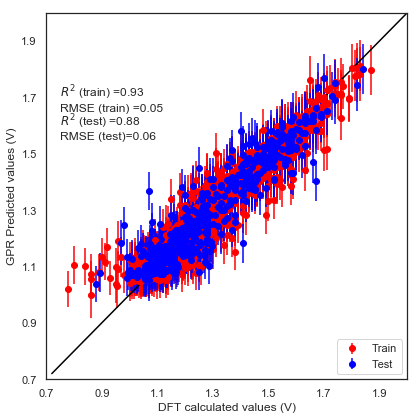

In [50]:
X = Xdata_btz_uncorr_clean
y = ERed_data['Ered(V)']
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pytorch(X=X,y=y,train_by_test=0.8)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

returning scaled train and test data


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.89, RMSE = 0.06, MAE = 0.04)
Train: min error = 0.06 max_err 0.12
Test: min error = 0.06 max_err 0.12


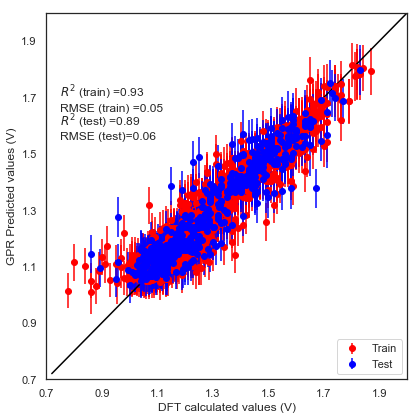

In [51]:
X = Xdata_btz_uncorr_clean_scaffold
y = ERed_data['Ered(V)']
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pytorch(X=X,y=y,train_by_test=0.8)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

# GPR model built with sklearn

In [52]:
def gpregression_feat(Xtrain,Ytrain,Nfeature):    
    # cmean=1.0
    # cbound=[1e-3, 1e3]
    cmean=[1.0]*Nfeature
    cbound=[[1e-3, 1e3]]*Nfeature
    kernel = C(1.0, (1e-3,1e3)) * matk(cmean,cbound,1.5) + Wht(1.0, (1e-3, 1e3))  # Matern kernel
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=30, normalize_y=False)
    gpr.fit(Xtrain, Ytrain)
    return gpr

def gpregression(Xtrain,Ytrain):    
    cmean=1.0
    cbound=[1e-3, 1e3]
    kernel = C(1.0, (1e-3,1e3)) * matk(cmean,cbound,1.5) + Wht(1.0, (1e-3, 1e3))  # Matern kernel
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=False)
    gpr.fit(Xtrain, Ytrain)
    return gpr

    
def gprediction(gpnetwork,xtest):
    y_pred, sigma = gpnetwork.predict(xtest, return_std=True)
    return y_pred, sigma

In [53]:
def gpr_one_sklearn(X,y,train_by_test=0.8):

    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_by_test) 

    xtrain, xtest = do_scaling(scaler=StandardScaler(),xtrain=X_train, xtest=X_test)

    model  = gpregression(xtrain,y_train)
    
    ypred_test, yerr_test = gprediction(model,xtest=xtest)
    ypred_train, yerr_train = gprediction(model,xtest=xtrain)
    
    return y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train

In [54]:
# X = Xdata_btz_uncorr_clean
# y = ERed_data['Ered(V)']
# y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_sklearn(X=X,y=y,train_by_test=0.8)
# plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

In [55]:
# X = Xdata_btz_uncorr_clean_scaffold
# y = ERed_data['Ered(V)']
# y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_sklearn(X=X,y=y,train_by_test=0.8)
# plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

# Add more ringstat features

In [56]:
def ring_stats(smiles):
    """
    if smi="CN1CN(C)c2cc3nsnc3cc21" 
    then ring_stats(smi) will return a list of number of rings of size [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
    # rings start with size 3
    Output:    [0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0]
    molecule has 2 and 1 rings of size 5 and 6, respectively
    """
    m = Chem.MolFromSmiles(smiles)
    
    d=13 # rings won't have more than 13 atoms
    nring=[0]*d
    rings=m.GetRingInfo()
    for ring in rings.AtomRings():
        sr=""
        n=0
        for atom in ring:
            sr+=m.GetAtomWithIdx(atom).GetSymbol()
            n+=1

        if(n<d):
            nring[n]+=1 # total rings
    return nring    

In [57]:
def hetroring_stats(smiles):
    """
    Retrun a list of number of hetrocylces of sizes from 3 to 13

    Eg. if smi="CN1CN(C)c2cc3nsnc3cc21" 
    then the hetroring_stats(smi) will return :  hetrocycle ring of size [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
    Output: [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
    There are 2 hetrorings of size 5
    """
    m = Chem.MolFromSmiles(smiles)
    
    d=13 # rings won't have more than 13 atoms
    nHring=[0]*d
    
    rings=m.GetRingInfo()
    for ring in rings.AtomRings():
        sr=""
        n=0
        for atom in ring:
            sr+=m.GetAtomWithIdx(atom).GetSymbol()
            n+=1

        if(n<d):
            c=sr.count('C')
            if(c<n): # hetro-atom cycle
                nHring[n]+=1
    return nHring    

In [58]:
Xdata_btz_uncorr_clean_scaffold["ring_stats"]=ERed_data["SMILES"].apply(lambda smi:ring_stats(smi))

Xdata_btz_uncorr_clean_scaffold["hring_stats"]=ERed_data["SMILES"].apply(lambda smi:hetroring_stats(smi))

In [59]:
col_txt=["nring"+str(i) for i in range(len(Xdata_btz_uncorr_clean_scaffold["ring_stats"][0]))]
df_ring=pd.DataFrame(Xdata_btz_uncorr_clean_scaffold["ring_stats"].to_list(),columns=col_txt)
df_ring=df_ring.drop(df_ring.columns[df_ring.eq(0).all()],axis=1)

col_txt=["nHring"+str(i) for i in range(len(Xdata_btz_uncorr_clean_scaffold["hring_stats"][0]))]
df_hring=pd.DataFrame(Xdata_btz_uncorr_clean_scaffold["hring_stats"].to_list(),columns=col_txt)
df_hring=df_hring.drop(df_hring.columns[df_hring.eq(0).all()],axis=1)

In [60]:
Xdata_btz_uncorr_clean_scaffold=Xdata_btz_uncorr_clean_scaffold.drop(columns=["ring_stats","hring_stats"])
Xdata_btz_uncorr_clean_scaffold.head()

Scaffold  EState_VSA8  PEOE_VSA9   SMR_VSA6     exactmw  VSA_EState2  \
0         0    57.579929  23.102960  57.121861  291.151767     7.048598   
1         0    38.460741  29.709842  49.695525  292.135782     4.836841   
2         0    57.748939  28.790346  41.798549  291.151767     4.777731   
3         0    50.701267  28.790346  47.840390  305.167417     4.943843   
4         0    57.625004  28.790346  41.295634  305.167417     4.922731   

   SMR_VSA10  VSA_EState8  NumHeterocycles  PEOE_VSA8  ...  NumSaturatedRings  \
0  34.136361     6.418928              2.0  38.790149  ...                0.0   
1  34.136361     9.134667              2.0  38.852275  ...                0.0   
2  39.823748     9.584423              2.0  32.723782  ...                0.0   
3  39.823748    11.767929              2.0  32.723782  ...                0.0   
4  39.823748    12.885515              2.0  32.220866  ...                0.0   

   Asphericity  PEOE_VSA11  BalabanJ  EState_VSA7  BCUT2D_CHGLO  SMR_VSA9  \
0     0.380879         0.0  2.063612          0.0     -2.382209       0.0   
1     0.274450         0.0  2.122519          0.0     -2.390295       0.0   
2     0.164608         0.0  2.285684          0.0     -2.402864       0.0   
3     0.231434         0.0  2.222052          0.0     -2.393344       0.0   
4     0.197662         0.0  2.274537          0.0     -2.414260       0.0   

   BCUT2D_LOGPLOW  VSA_EState5  InertialShapeFactor  
0       -2.421053          0.0             0.000797  
1       -2.423841          0.0             0.000491  
2       -2.428193          0.0             0.000600  
3       -2.414287          0.0             0.000343  
4       -2.441912          0.0             0.000409  

[5 rows x 26 columns]

In [61]:
df_ring.columns,df_hring.columns

(Index(['nring5', 'nring6', 'nring7', 'nring8', 'nring9'], dtype='object'),
 Index(['nHring5', 'nHring6', 'nHring7', 'nHring8', 'nHring9'], dtype='object'))

In [62]:
Xdata_btz_uncorr_clean_scaffold_rings=pd.concat([Xdata_btz_uncorr_clean_scaffold,df_ring,df_hring],axis=1)

In [63]:
temp=False
for j in Xdata_btz_uncorr_clean_scaffold_rings.items():
    if any(Xdata_btz_uncorr_clean_scaffold_rings[j[0]].isna()):
        temp=True
        print("NaN found")
        break

In [64]:
ERed_data.shape,Xdata_btz_uncorr_clean_scaffold_rings.shape

((2763, 2), (2763, 36))

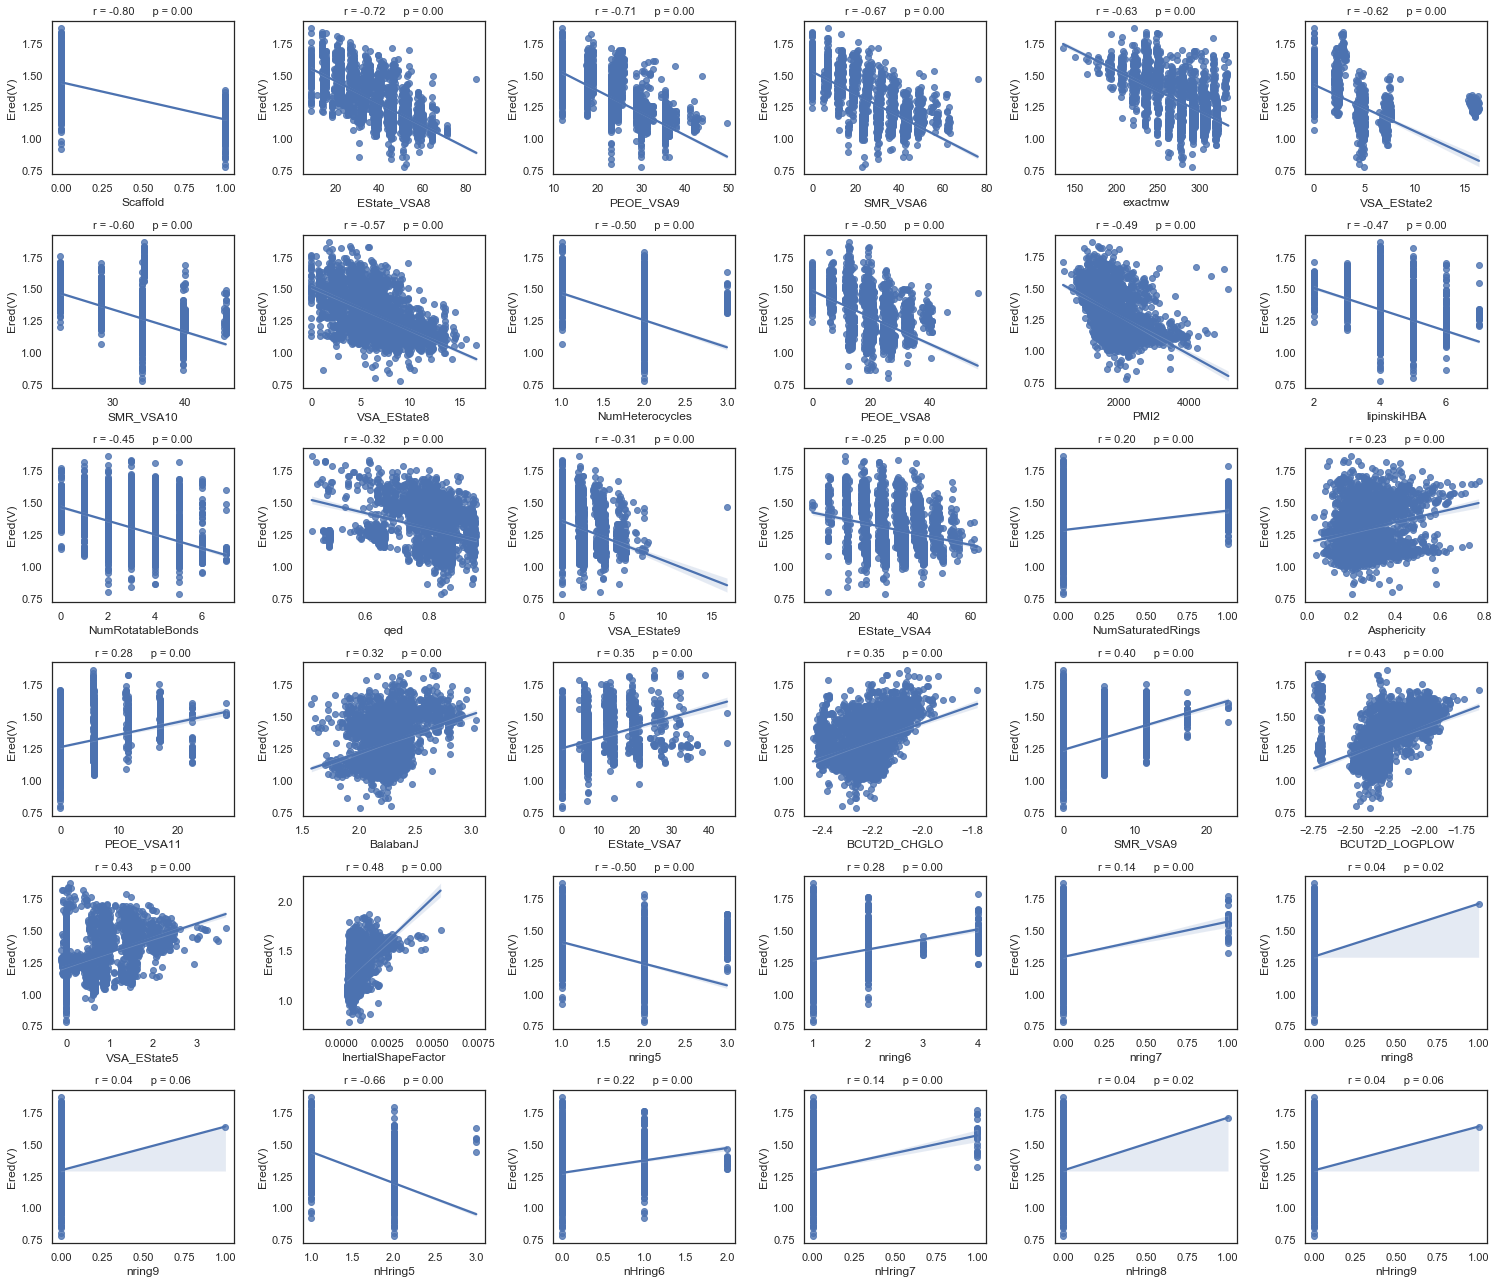

In [65]:
target = 'Ered(V)'
descriptors=Xdata_btz_uncorr_clean_scaffold_rings.columns

nr_rows = 6
nr_cols = 6
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        
        if i < len(descriptors):

            # print(i,descriptors[i])
            sns.regplot(x=Xdata_btz_uncorr_clean_scaffold_rings[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            
            stp = stats.pearsonr(Xdata_btz_uncorr_clean_scaffold_rings[descriptors[i]], ERed_data[target])
            # corr_ered_feat.append([descriptors[i],stp[0]])
            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            # corr_ered_feat.append([descriptors[i],stp[0]])
            axs[r][c].set_title(str_title,fontsize=11)
        else:
            fig.delaxes(axs[r][c])
            
plt.tight_layout()    
# plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

returning scaled train and test data


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.87, RMSE = 0.07, MAE = 0.05)
Train: min error = 0.06 max_err 0.11
Test: min error = 0.06 max_err 0.11


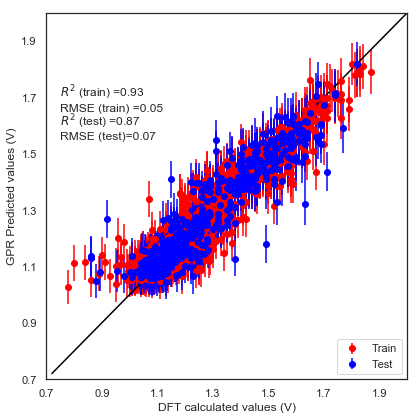

In [66]:
X = Xdata_btz_uncorr_clean_scaffold_rings.drop(columns=["nring8","nring9","nHring8","nHring9"])
y = ERed_data['Ered(V)']
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pytorch(X=X,y=y,train_by_test=0.8)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

# PCA

In [67]:
Xdata_btz_uncorr_clean_scaffold_rings_st= do_scaling(scaler=StandardScaler(),xtrain=Xdata_btz_uncorr_clean_scaffold_rings, xtest=None)

test data is not provided, returning only scaled train data


No. of PC           Cumulative variance                                                             
--------------------------------------------------
1                   0.275243                                                                        
2                   0.377380                                                                        
3                   0.462258                                                                        
4                   0.530949                                                                        
5                   0.589889                                                                        
6                   0.645517                                                                        
7                   0.701009                                                                        
8                   0.752831                                                                        
9                   0.798858            

C:\Users\jaina\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


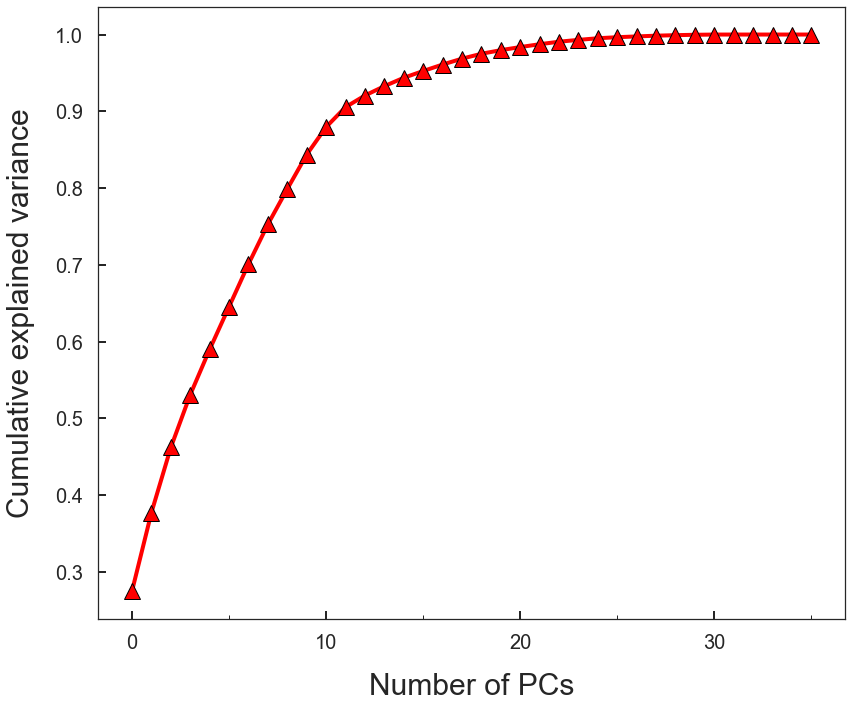

In [68]:
from sklearn.decomposition import PCA # Principle component analysis
import matplotlib.pyplot as plt  
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
pca = PCA().fit(Xdata_btz_uncorr_clean_scaffold_rings_st)

#Plotting
fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of PCs', fontsize=30,labelpad=20)
ax1.set_ylabel('Cumulative explained variance', fontsize=30,labelpad=20)
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.tick_params(axis='both', which='major', direction='in', size=8, left='on', bottom='on', width=2, pad=15)
ax1.tick_params(axis='both', which='minor', direction='in', size=4, left='on', bottom='on',width=1, pad=15)
ax1.tick_params(axis="y", labelsize=20)
ax1.tick_params(axis="x", labelsize=20)

plt.gcf().set_size_inches((12, 10))
evr = np.cumsum(pca.explained_variance_ratio_)
ax1.plot(evr, marker='^',markersize=16, markeredgecolor='black', 
         linestyle='-',linewidth=4, color='red')   # Plotting
plt.tight_layout()
# plt.savefig("./Figures/Xdata_reduced_pca.png",dpi=300)
print('{:<20s}{:<80s}'.format('No. of PC','Cumulative variance'))
print(50*'-')
for i,a in enumerate(evr):
    if a<=1:
        print('{:<20d}{:<80f}'.format(i+1,a))

In [69]:
def gpr_one_pca_pytorch(X,y,train_by_test=0.8,nPC=25):

    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_by_test) 

    xtrain, xtest = do_scaling(scaler=StandardScaler(),xtrain=X_train, xtest=X_test)
    # PCA
    n_PC = nPC  # Set number of principle components
    pca = PCA(n_components=n_PC)
        
    xtrain = pca.fit_transform(xtrain) 
    xtest=pca.transform(xtest)
    print(f"xtrain.shape={xtrain.shape},xtest.shape={xtest.shape}")
    model, likelihood = gpregression_pytorch(xtrain,y_train,verbose=False)
    
    ypred_test, yerr_test = gprediction_pytorch(model,likelihood,xtest)
    ypred_train, yerr_train = gprediction_pytorch(model,likelihood,xtrain)
    
    return y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train

returning scaled train and test data
xtrain.shape=(2210, 25),xtest.shape=(553, 25)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.89, RMSE = 0.06, MAE = 0.04)
Train: min error = 0.06 max_err 0.12
Test: min error = 0.06 max_err 0.11


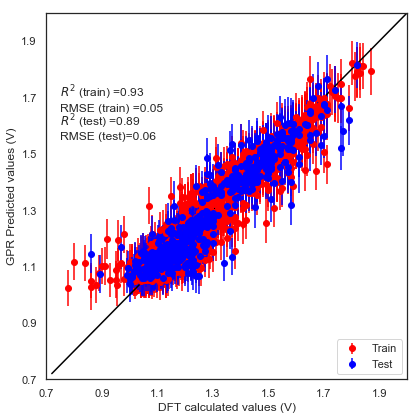

In [70]:
X = Xdata_btz_uncorr_clean_scaffold_rings
y = ERed_data['Ered(V)']
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_by_test=0.8,nPC=25)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

returning scaled train and test data
xtrain.shape=(2210, 20),xtest.shape=(553, 20)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.92, RMSE = 0.05, MAE = 0.04)
(Test:  R2 = 0.88, RMSE = 0.06, MAE = 0.05)
Train: min error = 0.06 max_err 0.13
Test: min error = 0.06 max_err 0.12


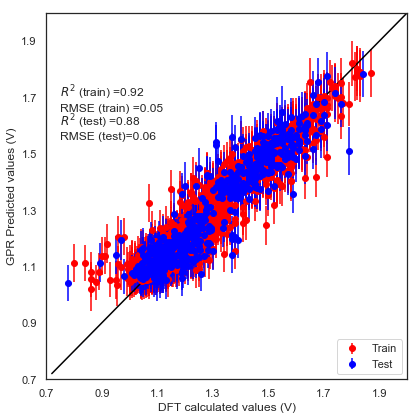

In [71]:
X = Xdata_btz_uncorr_clean_scaffold_rings
y = ERed_data['Ered(V)']
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_by_test=0.8,nPC=20)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

returning scaled train and test data
xtrain.shape=(2210, 10),xtest.shape=(553, 10)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.90, RMSE = 0.06, MAE = 0.04)
(Test:  R2 = 0.87, RMSE = 0.06, MAE = 0.05)
Train: min error = 0.06 max_err 0.14
Test: min error = 0.06 max_err 0.1


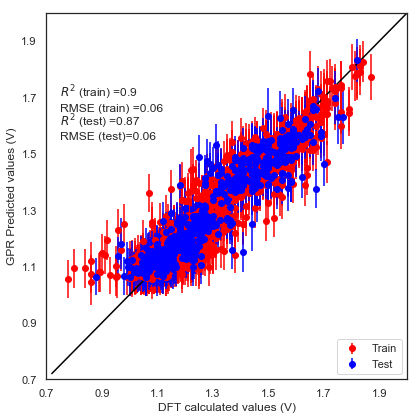

In [72]:
X = Xdata_btz_uncorr_clean_scaffold_rings
y = ERed_data['Ered(V)']
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_by_test=0.8,nPC=10)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

# Try 
- Treat outliers
- PCA must have taken care of ring 7,8 and 9 feature.
- No significant improvement with the ring stats.
- Performancwe increased with more data

In [73]:
def other_ring_stats(smiles):
    """
    Return a list which contains [number of carbon atoms (nC) in all homocycles, nC in all heterocycles,nN in all hetrocycle, nS in all hetrocycles, nO in all hetrocycles ]
    """
    m = Chem.MolFromSmiles(smiles)
    
    numH_C,numH_N,numH_S,numH_O=0,0,0,0
    num_C_homo=0
    ri=m.GetRingInfo()
    
    for r in ri.AtomRings():
        sr=""
        ringsize=0
        for i in r:
            sr+=m.GetAtomWithIdx(i).GetSymbol()
            ringsize+=1
        # print(sr)
        num_c=sr.count('C')
        
        # count number of S, N, C, and O in hetrocycles
        if  num_c < ringsize: # count in hetrocycles
            numH_C+=num_c
            numH_N+=sr.count('N')
            numH_S+=sr.count('S')
            numH_O+=sr.count('O')
        else:
            num_C_homo+=ringsize
    return [num_C_homo,numH_C,numH_N,numH_O,numH_S]

In [74]:
new_RingD=ERed_data["SMILES"].apply(lambda smi:other_ring_stats(smi)).to_list()
col_txt=["nhomo_C","nhetro_C","nhetro_N","nhetro_O","nhetro_S"]
df_ringD=pd.DataFrame(new_RingD,columns=col_txt)
df_ringD=df_ringD.drop(df_ringD.columns[df_ringD.eq(0).all()],axis=1)

In [75]:
Xdata_btz_uncorr_clean_scaffold_ringsD=pd.concat([Xdata_btz_uncorr_clean_scaffold_rings.drop(columns=["nring8","nring9","nHring8","nHring9"]),df_ringD],axis=1)
Xdata_btz_uncorr_clean_scaffold_ringsD.shape

(2763, 37)

In [76]:
temp=False
for j in Xdata_btz_uncorr_clean_scaffold_ringsD.items():
    if any(Xdata_btz_uncorr_clean_scaffold_ringsD[j[0]].isna()):
        temp=True
        print("NaN found")
        break

X.shape=(2763, 37)
returning scaled train and test data
xtrain.shape=(2210, 20),xtest.shape=(553, 20)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.86, RMSE = 0.07, MAE = 0.05)
Train: min error = 0.06 max_err 0.12
Test: min error = 0.06 max_err 0.11


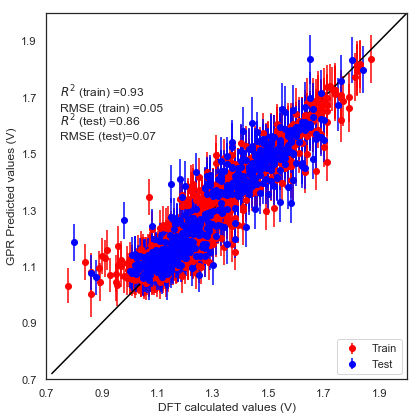

In [77]:
X = Xdata_btz_uncorr_clean_scaffold_ringsD
print(f"X.shape={X.shape}")
y = ERed_data['Ered(V)']
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_by_test=0.8,nPC=20)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

X.shape=(2763, 37)
returning scaled train and test data
xtrain.shape=(2210, 25),xtest.shape=(553, 25)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.88, RMSE = 0.07, MAE = 0.05)
Train: min error = 0.06 max_err 0.11
Test: min error = 0.06 max_err 0.11


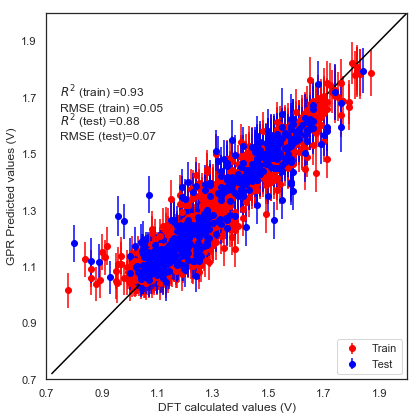

In [78]:
X = Xdata_btz_uncorr_clean_scaffold_ringsD
print(f"X.shape={X.shape}")
y = ERed_data['Ered(V)']
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_by_test=0.8,nPC=25)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

X.shape=(2763, 37)
returning scaled train and test data
xtrain.shape=(2210, 30),xtest.shape=(553, 30)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.89, RMSE = 0.06, MAE = 0.04)
Train: min error = 0.06 max_err 0.12
Test: min error = 0.06 max_err 0.1


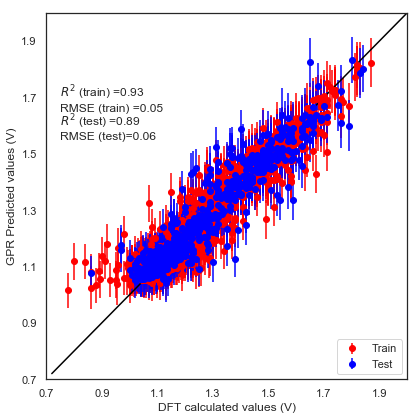

In [79]:
X = Xdata_btz_uncorr_clean_scaffold_ringsD
print(f"X.shape={X.shape}")
y = ERed_data['Ered(V)']
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_by_test=0.8,nPC=30)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

# Remove outliers

**detection of outliers using the local outlier factor algorithm**

In [80]:
descriptors=Xdata_btz_uncorr_clean_scaffold_ringsD.columns
X=Xdata_btz_uncorr_clean_scaffold_ringsD[descriptors].values
Y=ERed_data["Ered(V)"]
print(f"X.shape={X.shape},Y.shape={Y.shape}")

X.shape=(2763, 37),Y.shape=(2763,)


*Standardization is calculated by subtracting the mean value and dividing by the standard deviation.*

*value = (value – mean) / stdev*

*Sometimes an input variable may have outlier values. These are values on the edge of the distribution that may have a low probability of occurrence, yet are overrepresented for some reason. Outliers can skew a probability distribution and make data scaling using standardization difficult as the calculated mean and standard deviation will be skewed by the presence of the outliers.*

***One approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.***

***This is called robust standardization or robust data scaling.***

***This can be achieved by calculating the median (50th percentile) and the 25th and 75th percentiles. The values of each variable then have their median subtracted and are divided by the interquartile range (IQR) which is the difference between the 75th and 25th percentiles.***

***value = (value – median) / (p75 – p25)***

***The resulting variable has a zero mean and median and a standard deviation of 1, although not skewed by outliers and the outliers are still present with the same relative relationships to other values.***

In [81]:
# from sklearn.preprocessing import Normalizer, normalize
from sklearn.preprocessing import Normalizer, normalize, RobustScaler
scaler = RobustScaler()
Xnorm = scaler.fit(X).transform(X)

In [82]:
print(f"Xnorm.mean()={Xnorm.mean():0.2f},Xnorm.std()={Xnorm.std():0.2f}")

Xnorm.mean()=0.02,Xnorm.std()=1.02


In [83]:
from sklearn.neighbors import LocalOutlierFactor
outlier_scores = LocalOutlierFactor(n_neighbors=30,novelty=False).fit_predict(Xnorm)

In [84]:
lof_no_outliers = Xdata_btz_uncorr_clean_scaffold_ringsD.iloc[outlier_scores == 1]
lof_outliers = Xdata_btz_uncorr_clean_scaffold_ringsD.iloc[outlier_scores == -1]

lof_no_outliers.shape,lof_outliers.shape

((2703, 37), (60, 37))

In [85]:
legend_=[]
for jj in lof_outliers.index.to_list():
    legend_.append("Ered = "+str(ERed_data['Ered(V)'].loc[jj]))
# legend_

In [86]:
import datamol as dm

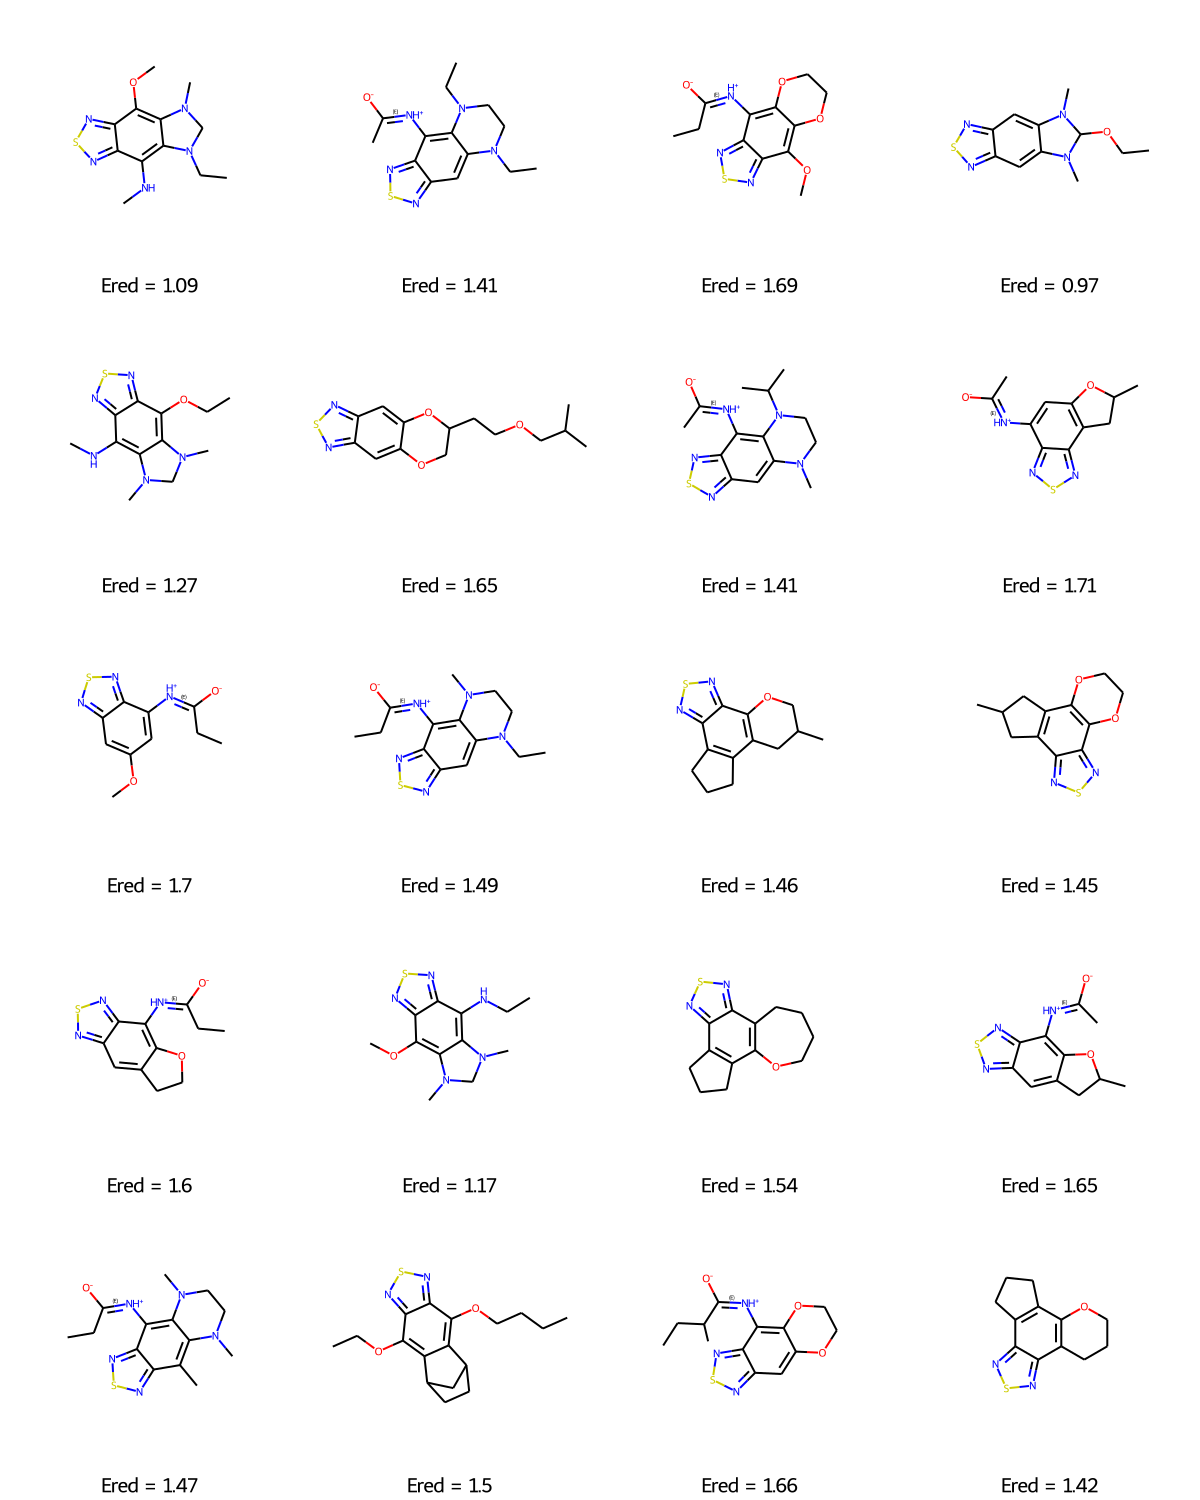

In [87]:
mols=[Chem.MolFromSmiles(smi) for smi in ERed_data.loc[lof_outliers.index.to_list()]["SMILES"]]
dm.to_image(mols[:20],legend_fontsize=20,legends=legend_[:20])

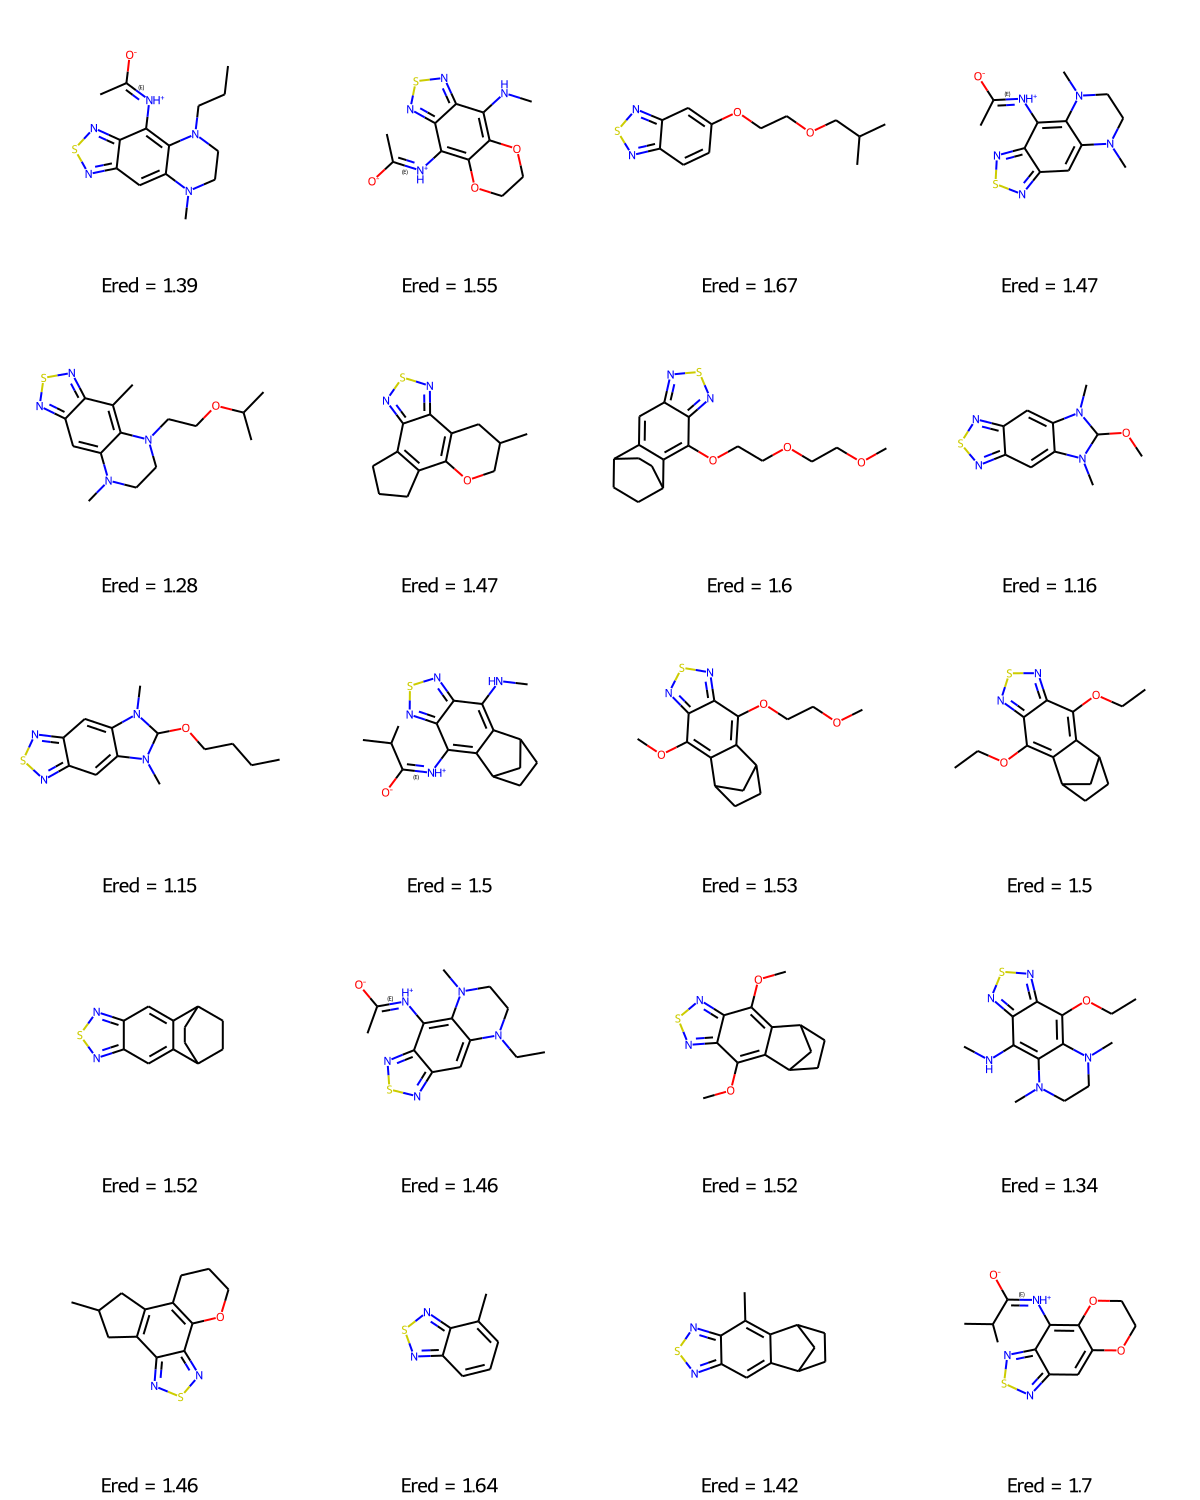

In [88]:
dm.to_image(mols[20:40],legend_fontsize=20,legends=legend_[20:40])

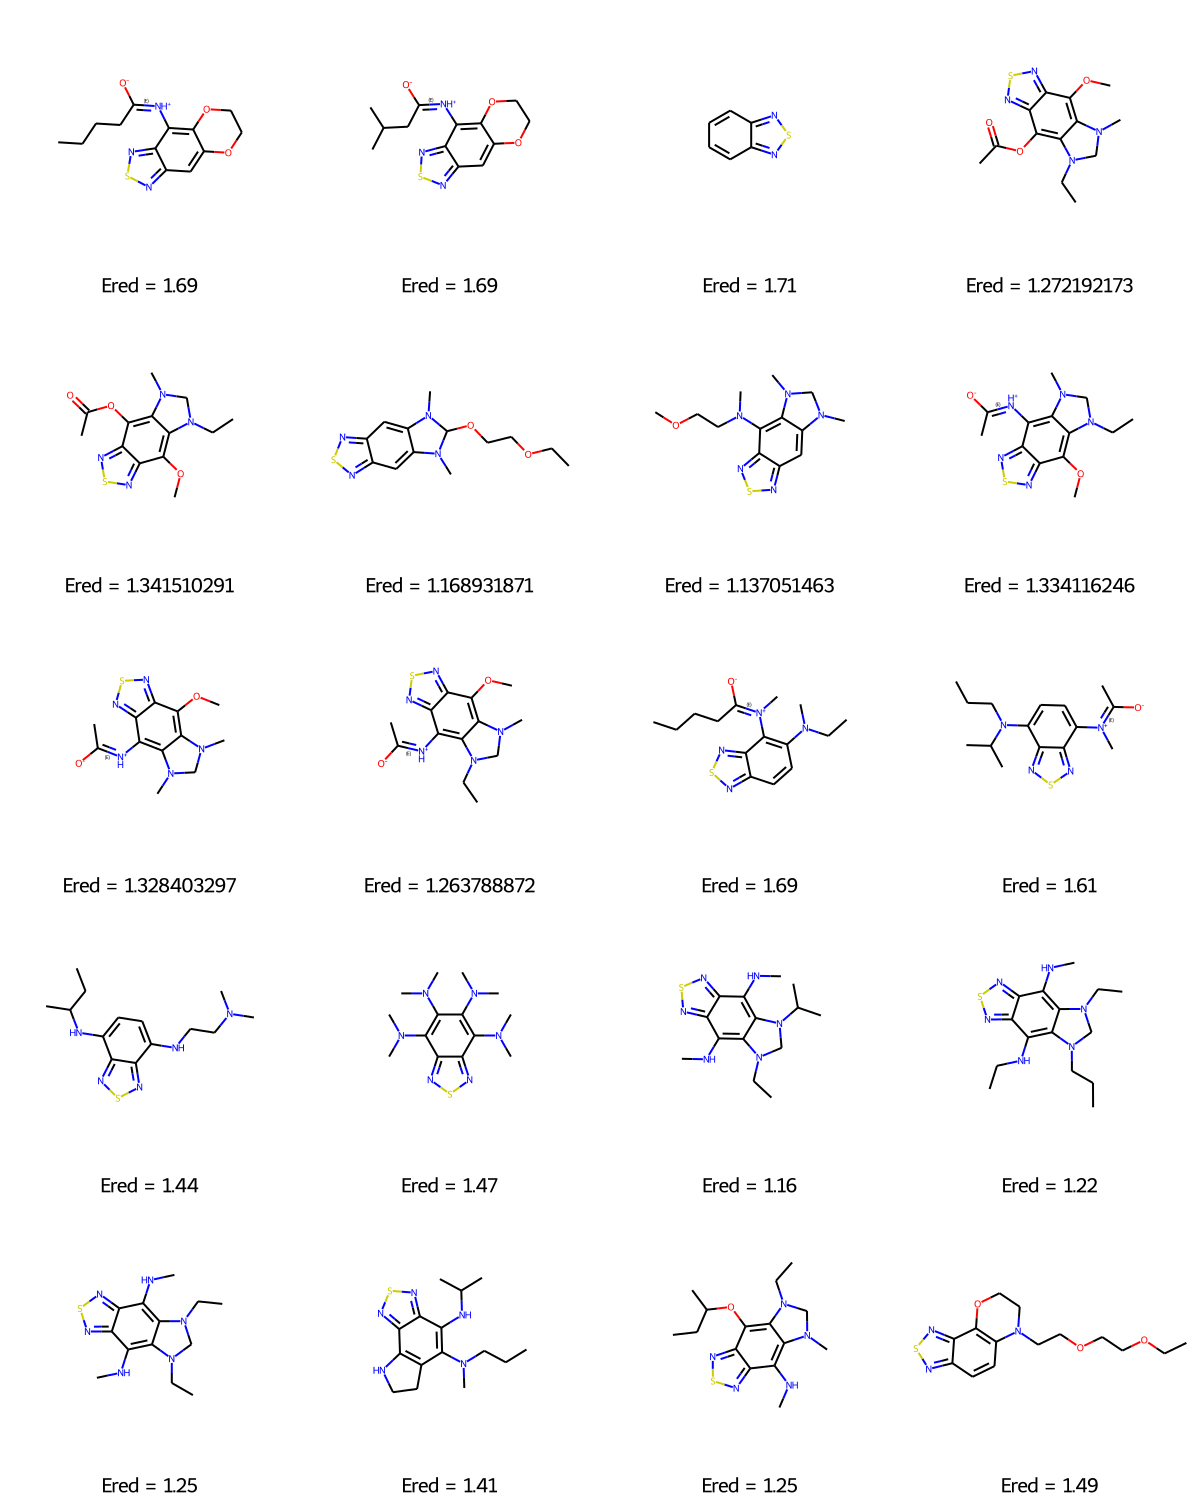

In [89]:
dm.to_image(mols[40:],legend_fontsize=20,legends=legend_[40:])

In [90]:
Ered_data_lof=ERed_data.loc[lof_no_outliers.index.to_list()]
print(Ered_data_lof.shape)

(2703, 2)


In [91]:
lof_no_outliers.index=np.arange(lof_no_outliers.shape[0])
Ered_data_lof.index=np.arange(Ered_data_lof.shape[0])
print(lof_no_outliers.shape,Ered_data_lof.shape)

(2703, 37) (2703, 2)


X.shape=(2703, 37)
returning scaled train and test data
xtrain.shape=(2162, 20),xtest.shape=(541, 20)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.92, RMSE = 0.05, MAE = 0.04)
(Test:  R2 = 0.88, RMSE = 0.06, MAE = 0.04)
Train: min error = 0.06 max_err 0.1
Test: min error = 0.06 max_err 0.1


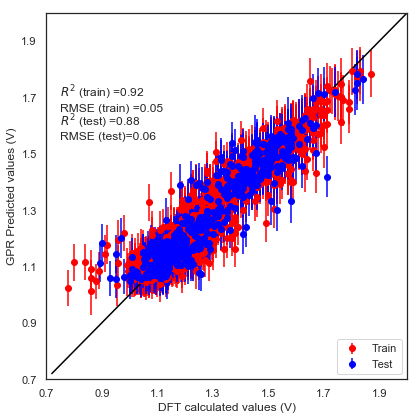

In [92]:
X = lof_no_outliers
print(f"X.shape={X.shape}")
y = Ered_data_lof['Ered(V)']
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_by_test=0.8,nPC=20)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

X.shape=(2703, 37)
returning scaled train and test data
xtrain.shape=(2162, 25),xtest.shape=(541, 25)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.88, RMSE = 0.06, MAE = 0.05)
Train: min error = 0.06 max_err 0.1
Test: min error = 0.06 max_err 0.1


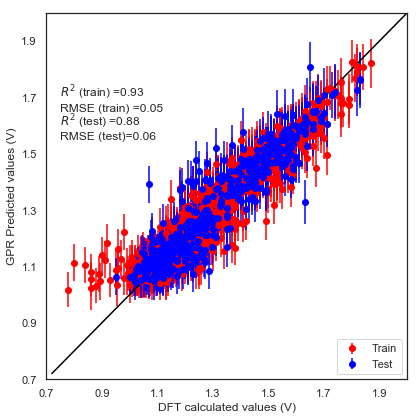

In [93]:
X = lof_no_outliers
print(f"X.shape={X.shape}")
y = Ered_data_lof['Ered(V)']
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_by_test=0.8,nPC=25)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

X.shape=(2703, 37)
returning scaled train and test data
xtrain.shape=(2162, 30),xtest.shape=(541, 30)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.86, RMSE = 0.07, MAE = 0.05)
Train: min error = 0.06 max_err 0.11
Test: min error = 0.06 max_err 0.1


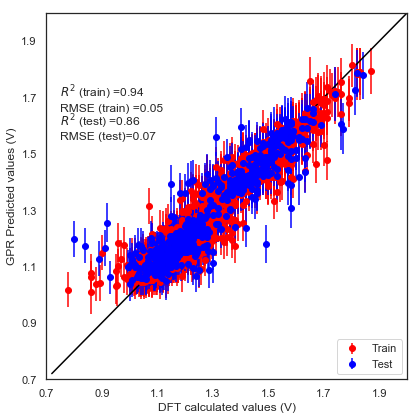

In [94]:
X = lof_no_outliers
print(f"X.shape={X.shape}")
y = Ered_data_lof['Ered(V)']
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_by_test=0.8,nPC=30)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

X.shape=(2703, 37)
returning scaled train and test data
xtrain.shape=(2432, 30),xtest.shape=(271, 30)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.86, RMSE = 0.07, MAE = 0.04)
Train: min error = 0.06 max_err 0.1
Test: min error = 0.06 max_err 0.1


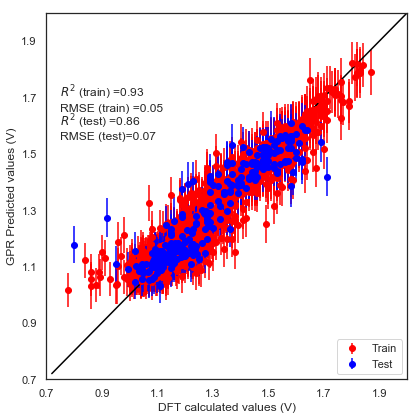

In [95]:
X = lof_no_outliers
print(f"X.shape={X.shape}")
y = Ered_data_lof['Ered(V)']
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_by_test=0.9,nPC=30)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)